In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import signal
import scipy.stats as stats
from findpeaks import findpeaks
from electrodes_manipulation import Eletrode
import scipy.stats as stats
import statsmodels.api as sm

In [2]:
elec = Eletrode()

Reading all data from the electrodes datasets 

In [3]:
comertial_electrode = pd.read_csv('C:\\Users\\pves\\Documents\\Voxar_Contexto\\Workspace\\heart_attack_analysis\\data\\comercial.csv', sep=';')
comertial_rodamine = pd.read_csv('C:\\Users\\pves\\Documents\\Voxar_Contexto\Workspace\\heart_attack_analysis\\data\\comercial_rodamina.csv', sep=';')
polimid = pd.read_csv('C:\\Users\\pves\\Documents\\Voxar_Contexto\Workspace\\heart_attack_analysis\\data\\Polimida.csv', sep=';')
polimid_rodamine = pd.read_csv('C:\\Users\\pves\\Documents\\Voxar_Contexto\\Workspace\\heart_attack_analysis\\data\\polimida_rodamina.csv', sep=';')

In [4]:
comertial_electrode.head()

V       A1       A2       A3           A4           A5           A6  \
0  0,649998  59,9268  56,3561  56,2829  56,97870255   57,7660799  58,08651447   
1  0,648002  59,5514  55,9991   55,935  56,60333633  57,42733479  57,72030354   
2  0,646005  59,1852  55,6695  55,6054  56,24628067  57,08858967  57,38155842   
3  0,644009  58,8464  55,3491   55,285  55,89838028  56,75897598   57,0428133   
4  0,642012  58,4985  55,0378  54,9737  55,56879044  56,42938614  56,71319962   

            A7           A8           A9          A10          A11  \
0  57,42733479  57,69283772   57,6287508  57,68368244  57,43649006   
1  57,07027912  57,33578205  57,26253986  57,30831623  57,07027912   
2  56,74066544  56,99701309   56,9237709  56,95123672  56,72235489   
3  56,42023087  56,66742325  56,58502579  56,61249161  56,39276505   
4  56,09064102   56,3378334  56,25543594  56,27374649   56,0631752   

           A12          A13          A14          A15          A16  \
0  56,97870255  57,53719807  57,23507404  57,86678791  57,66537189   
1  56,60333633   57,1801424  56,86883926  57,50973225  57,30831623   
2  56,24628067  56,83221817  56,53009415  57,16183186  56,96954727   
3  55,89838028  56,50262833  56,19134903  56,83221817  56,63995743   
4  55,55963516  56,17303848  55,86175919  56,50262833  56,31036758   

           A17          A18  
0  58,13229084  57,60128498  
1  57,75692463  57,24422932  
2  57,39986897  56,89630508  
3  57,05196857  56,56671524  
4  56,72235489   56,2371254

In [5]:
comertial_rodamine.head()

V Ac1 ac+R6G VC_1 Ac1 ac+R6G VC_2 Ac1 ac+R6G VC_3 Ac1 ac+R6G VC_4  \
0  0,649998         59,1577         60,1831         59,6979          61,236   
1  0,648002         57,8759         58,9563          58,352         59,9268   
2  0,646005         57,2625         58,3429         57,7111         59,2859   
3  0,644009         56,7773         57,8485         57,2168         58,7823   
4  0,642012         56,3287         57,3999          56,759         58,3062   

  Ac1 ac+R6G VC_5 Ac1 ac+R6G VC_6 Ac1 ac+R6G VC_7 Ac1 ac+R6G VC_8  \
0     60,53102016     61,30006313     61,14442348     61,13526821   
1     58,93797874     59,89012718     59,41405296     59,81688499   
2     58,20553303     59,23094749     58,63585472      59,1943264   
3     57,65621662     58,71825218     58,06820393     58,68163109   
4     57,15267658     58,22384357     57,54635334     58,19637775   

  Ac1 ac+R6G VC_9 Ac1 ac+R6G VC_10 Ac1 ac+R6G VC_11 Ac1 ac+R6G VC_12  \
0      60,9338522      60,51270962      61,01624966      61,08949184   
1     59,53307152      58,96544456      59,48729515      59,48729515   
2     58,85558128      58,26046467      58,76402855      58,75487328   
3     58,34286213      57,72030354      58,22384357      58,20553303   
4     57,85763264       57,2167635      57,72030354      57,70199299   

  Ac1 ac+R6G VC_13 Ac1 ac+R6G VC_14 Ac1 ac+R6G VC_15 Ac1 ac+R6G VC_16  \
0       61,3458395      59,99999046      60,70497036      60,38453579   
1      59,53307152      58,54427814      58,73656273      58,95628929   
2      58,69078636      57,86678791      57,84847736      58,29708576   
3      58,09566975      57,34493732      57,23507404      57,79354572   
4      57,56466389      56,85968399      56,69488907      57,30831623   

  Ac1 ac+R6G VC_17 Ac1 ac+R6G VC_18 Ac1 ac+R6G VC_19  
0      60,81483364      60,66834927      60,84229946  
1      59,04784203      59,40489769      59,52391624  
2      58,27877522       58,7823391       58,8830471  
3      57,71114826      58,28793049      58,37032795  
4      57,19845295      57,82101154        57,903409

In [6]:
polimid.head()

V B5 13071 C2 13071 D6 13071 E3 13071
0  0,550022  49,0867   48,986  51,9066    48,51
1  0,548026  45,6168   45,388  48,4001  44,7837
2  0,546029  44,2252  43,9048   46,862  43,2639
3  0,544033  43,3555   43,035  45,9464  42,3667
4  0,542036  42,6871  42,3575  45,2689  41,6983

In [7]:
polimid_rodamine.head()

V A4 ac+rod becker 30s C3 ac+rod becker 30s D2 ac+rod becker 30s  \
0  0,550022              42,6413              44,4907              43,3371   
1  0,548026              41,7258               43,447              42,1836   
2  0,546029              41,2589              42,9252              41,6983   
3  0,544033              40,8194              42,5132              41,2039   
4  0,542036              40,5447              42,1286              40,7828   

  E5 ac+rod becker 30s  
0              43,6301  
1              42,7695  
2               42,211  
3              41,7624  
4              41,4328

# Convertendo todos os valores para float

In [8]:
comertial_electrode = elec.convert_df_to_float_df(comertial_electrode)
comertial_rodamine = elec.convert_df_to_float_df(comertial_rodamine)
polimid = elec.convert_df_to_float_df(polimid)
polimid_rodamine = elec.convert_df_to_float_df(polimid_rodamine)

Verificando a existência de valores nulos ou que não são números

In [9]:
print(comertial_electrode.isna().any().sum())
print(comertial_rodamine.isna().any().sum())
print(polimid.isna().any().sum())
print(polimid_rodamine.isna().any().sum())

0
0
0
0


In [10]:
# Função que retorma o vetor do tempo dado o vetor de potencial e o scan_rate
def getTime( scan_rate, potential ):
    time = np.zeros(shape=potential.shape)
    delta_t = abs(potential[1] - potential[0]) / scan_rate
    
    for i in range(1, len(potential)):
        time[i] = delta_t + time[i - 1]
    
    return time
    
# Função que retorna o tempo total da série de voltametria cíclica
def get_total_time( scan_rate, potential):
    time = getTime(scan_rate, potential)
    return time[len(time)-1] 
    
# Função de Filtragem do sinal
def filter_low_pass_butterworth( fs, fc, order, y):
    # Frequência de corte normalizada
    w = fc / (fs / 2)
    print(f"Critical frequency {w}")
    b, a = signal.butter(order, w, 'low')
    out = signal.lfilter(b, a, y)
    #print(f'Shape Saida: {len(out)}')
    return out
    
# Função que calcula o sample rate do processo
def get_sampleRate( totalTime, lenght):
    return lenght / totalTime
    

    
# Função que calcula a primeira derivada
def derivate(x_axis, y_axis, time = False):
    
        #print(f'X Shape {len(x_axis)}')
        #print(f'Y Shape {len(y_axis)}')
    sample_rate = 0
    h = abs(x_axis[1] - x_axis[0])          # Calculating h difference
    # Padding to not losing data between derivate
    y = np.zeros(shape = (len(y_axis) + 2))
    # Coping the y array into y
    y[1:-1] = y_axis
    # Duplicating the last and the first elements
    y[0] = y_axis[0]
    y[len(y) - 1] = y_axis[len(y_axis) - 1]
    
    for k in range(len(y) - 1):
        y[k] = (y[k + 1] - y[k])/h
    
    # Filtragem do sinal da derivada
    if (not(time)):
        total_time = get_total_time(0.75, x_axis)
        sample_rate = get_sampleRate(total_time, len(x_axis))
    else:
        sample_rate = 1 / h
        
    out = filter_low_pass_butterworth(sample_rate, 5, 10, y[1:-1])
    #print(len(out))
    return (y[1:-1], out)

# Pega os argomentos das correntes anódicas e catódicas, retorna -1 se não achar o pico
def getAnodicAndCathodicArguments(current, fp, ox_inf = 500, ox_sup = 630, red_inf = 200, red_sup = 300):
    result_an_arg = 0
    result_cat_arg = 0
    # Encontrando os picos das duas funções
    results = fp.fit(current)
    #fp.plot(figsize=(12,7))
    results_df = results['df']
    # Separando os picos relacionados à oxidação
    results_oxidation = results_df.iloc[ox_inf:ox_sup,:]
    results_reduction = results_df.iloc[red_inf:red_sup, :]
    arg_anodic = results_oxidation[results_oxidation['peak'] == True]['x'].values
    arg_cathodic = results_reduction[results_reduction['valley'] == True]['x'].values
    
    if (len(arg_anodic) == 0):
        print("Erro na corrente anódica")
        result_an_arg = -1
    else:
        result_an_arg = arg_anodic[0]
        
    if (len(arg_cathodic) == 0):
        print("Erro na corrente catódica")
        result_cat_arg = -1
    else:
        result_cat_arg = arg_cathodic[0]
        
    return (result_an_arg, result_cat_arg)

# Calcula a carga total
def getTotalCharge(current, time):
    charge = np.trapz(current, time, axis=0)
    return charge

## Montando o dataset para o eletrodo comercial
Neste passo as observações são com relação ao potencial

Critical frequency 0.026588059512503717
Critical frequency 0.026588059512503717
[findpeaks] >Finding peaks in 1d-vector using [peakdetect] method..
[findpeaks] >Finding peaks in 1d-vector using [peakdetect] method..
Critical frequency 0.026588059512503717
Critical frequency 0.026588059512503717
[findpeaks] >Finding peaks in 1d-vector using [peakdetect] method..
[findpeaks] >Finding peaks in 1d-vector using [peakdetect] method..
Critical frequency 0.026588059512503717
Critical frequency 0.026588059512503717
[findpeaks] >Finding peaks in 1d-vector using [peakdetect] method..
[findpeaks] >Finding peaks in 1d-vector using [peakdetect] method..
Critical frequency 0.026588059512503717
Critical frequency 0.026588059512503717
[findpeaks] >Finding peaks in 1d-vector using [peakdetect] method..
[findpeaks] >Finding peaks in 1d-vector using [peakdetect] method..
Critical frequency 0.026588059512503717
Critical frequency 0.026588059512503717
[findpeaks] >Finding peaks in 1d-vector using [peakdetec

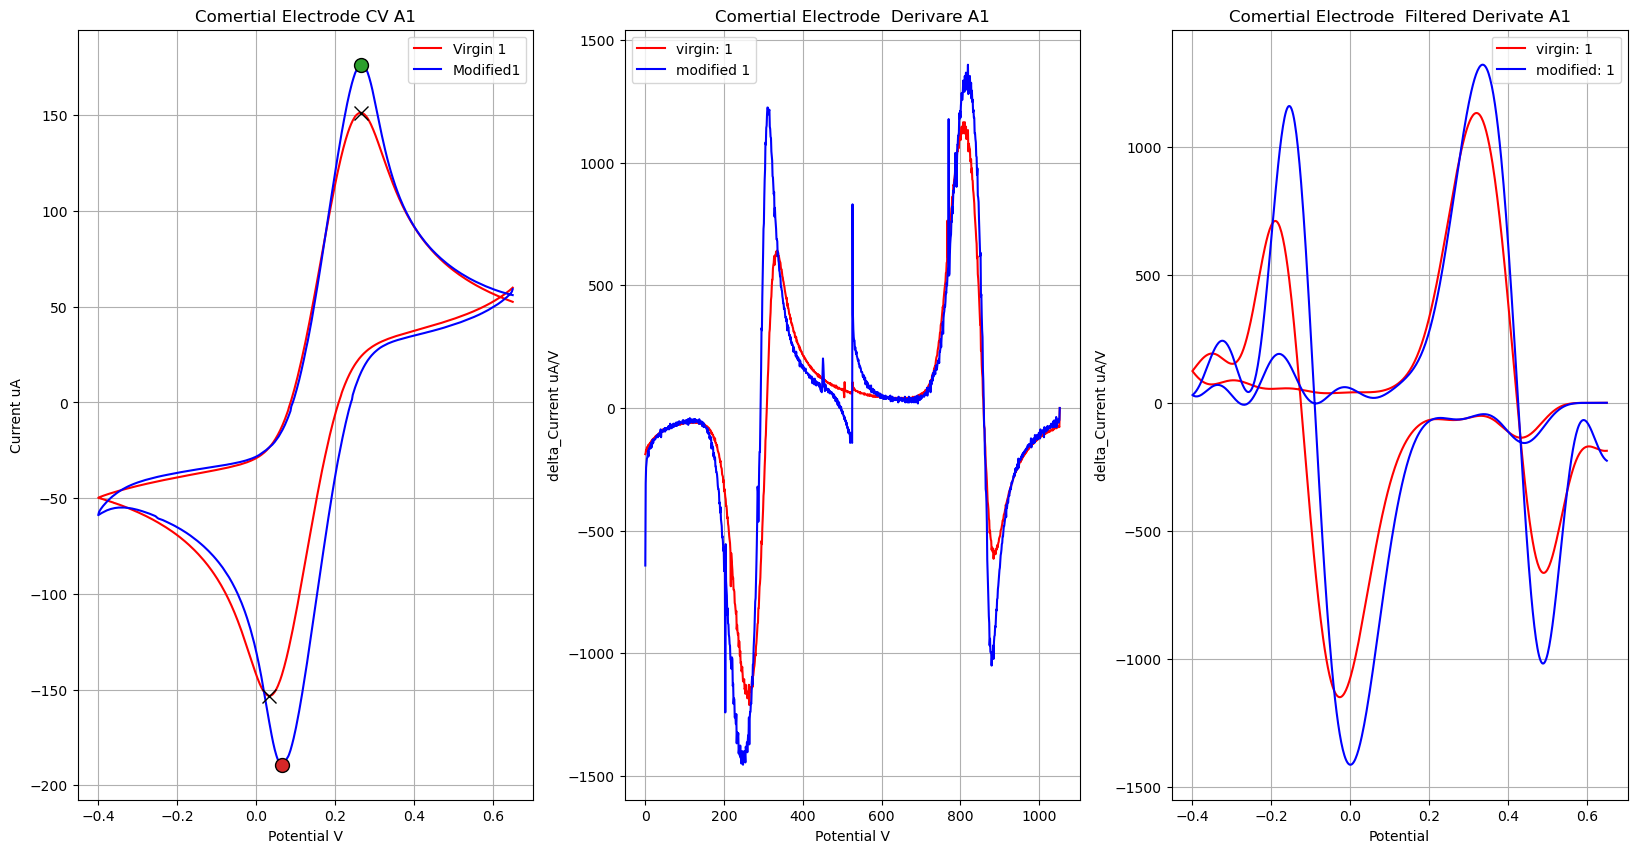

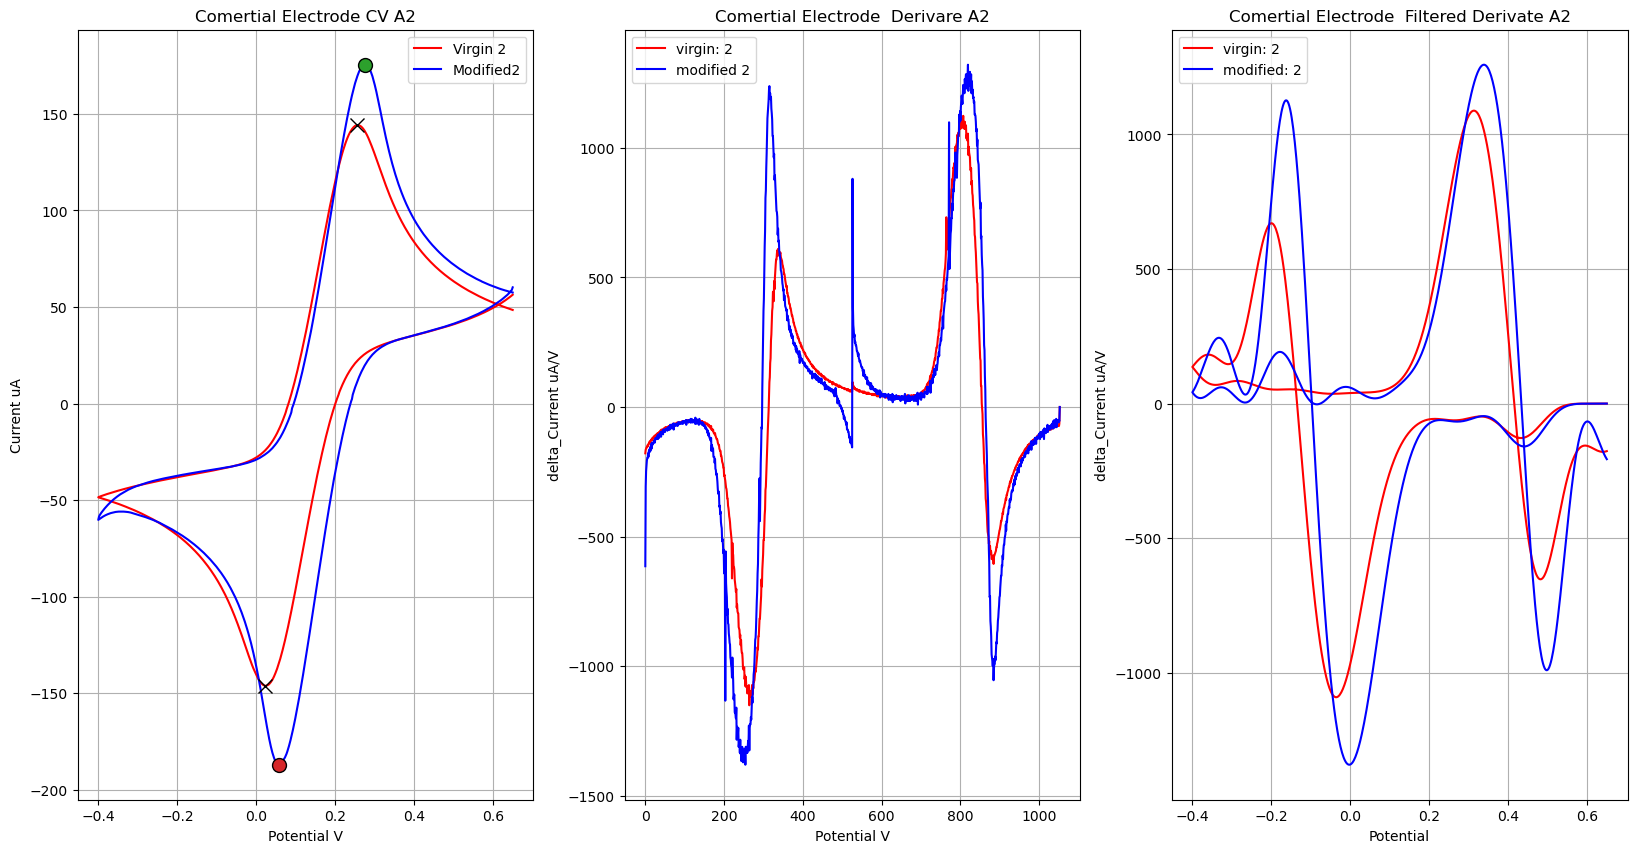

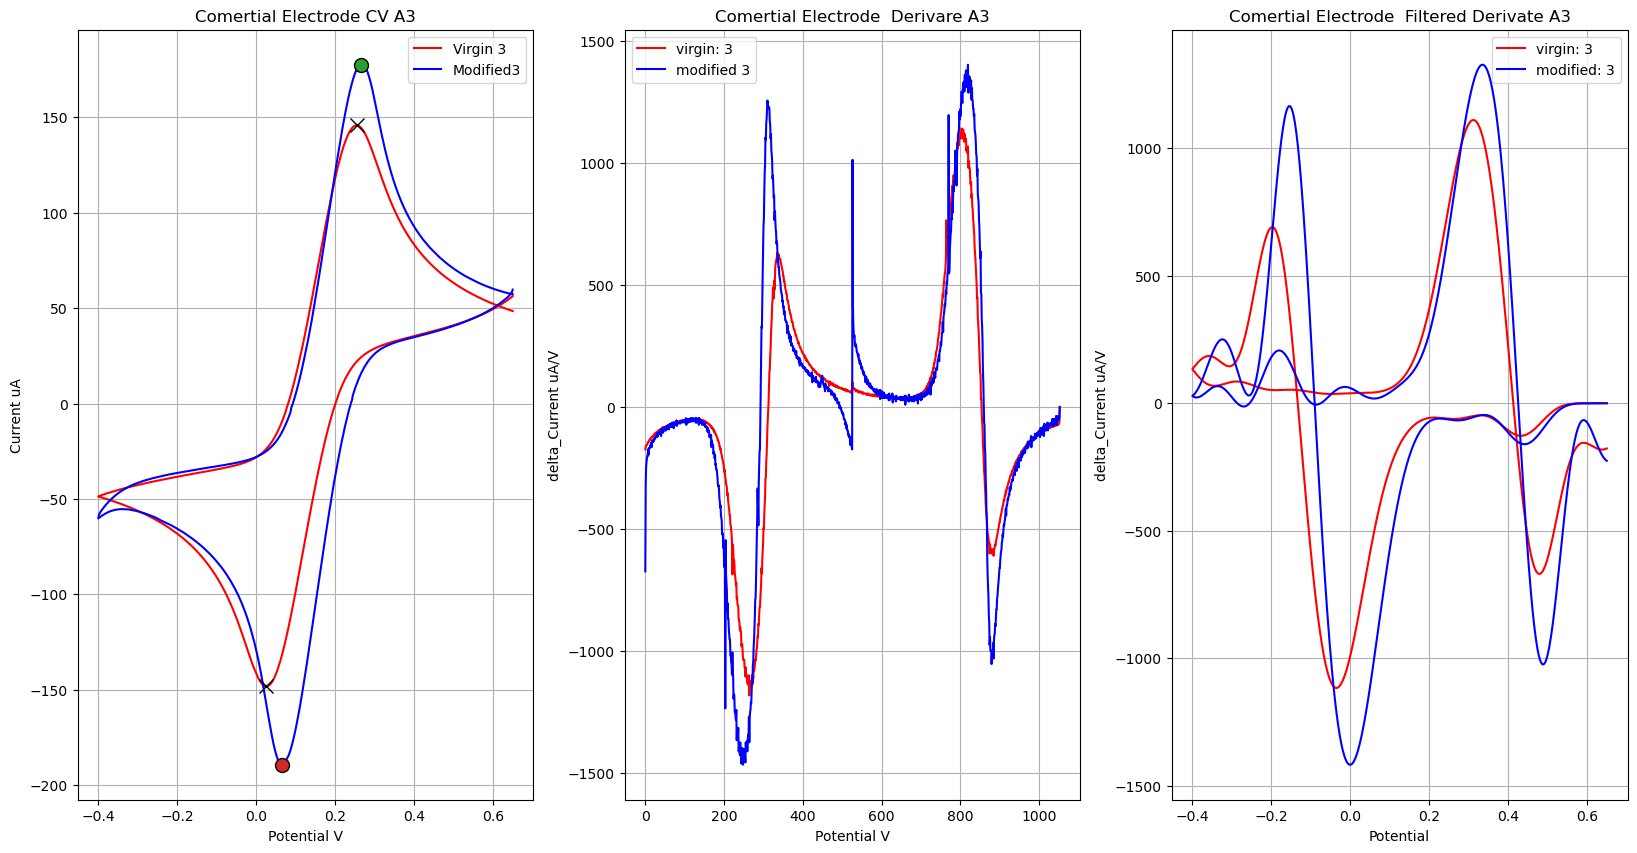

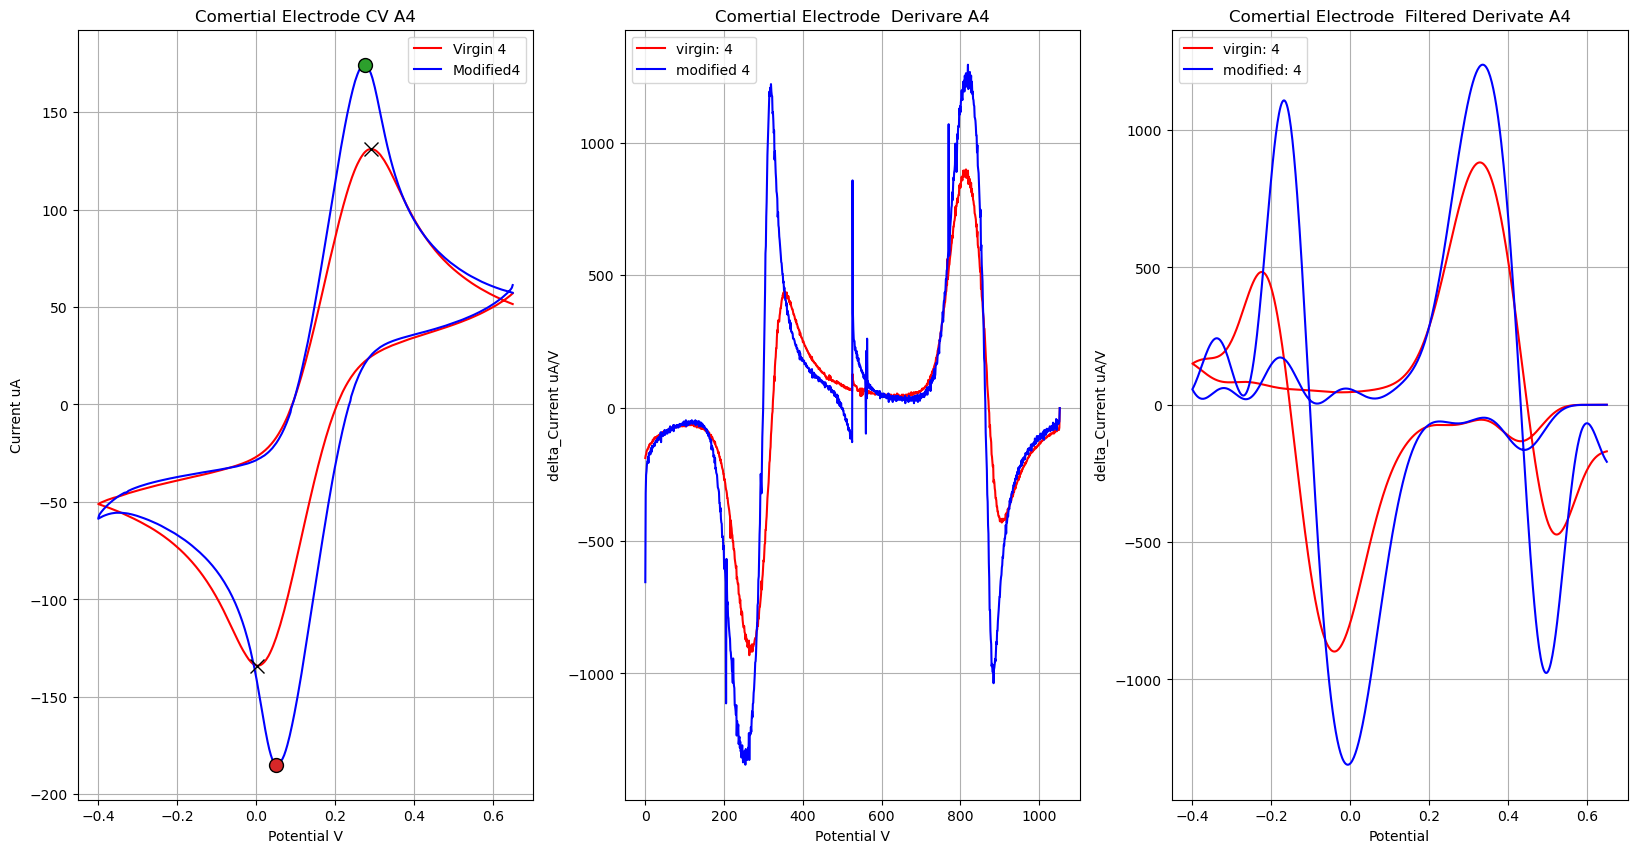

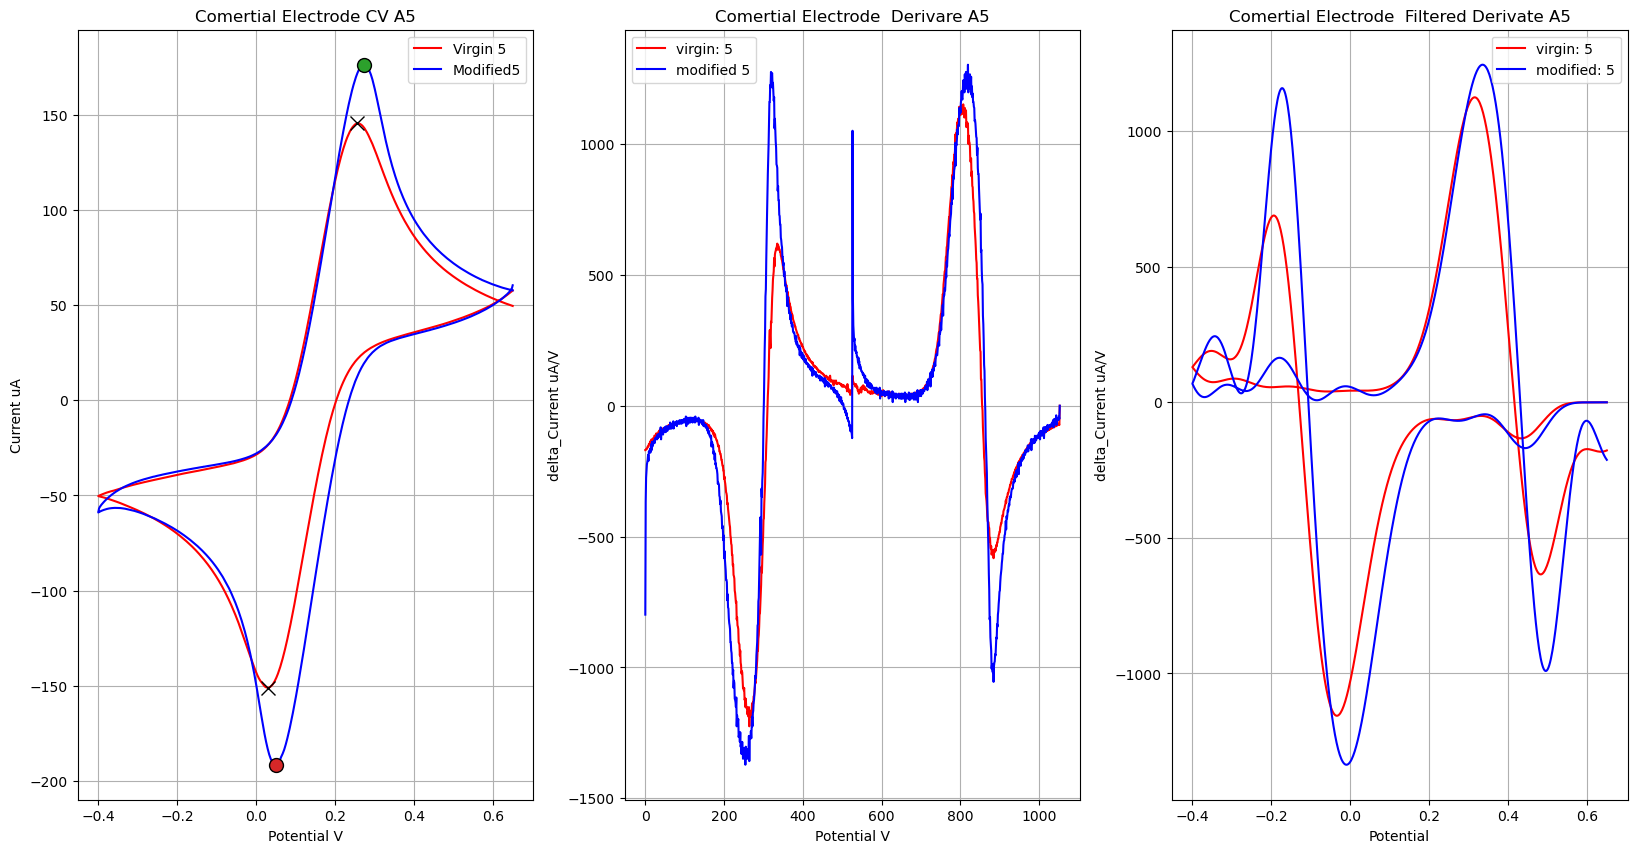

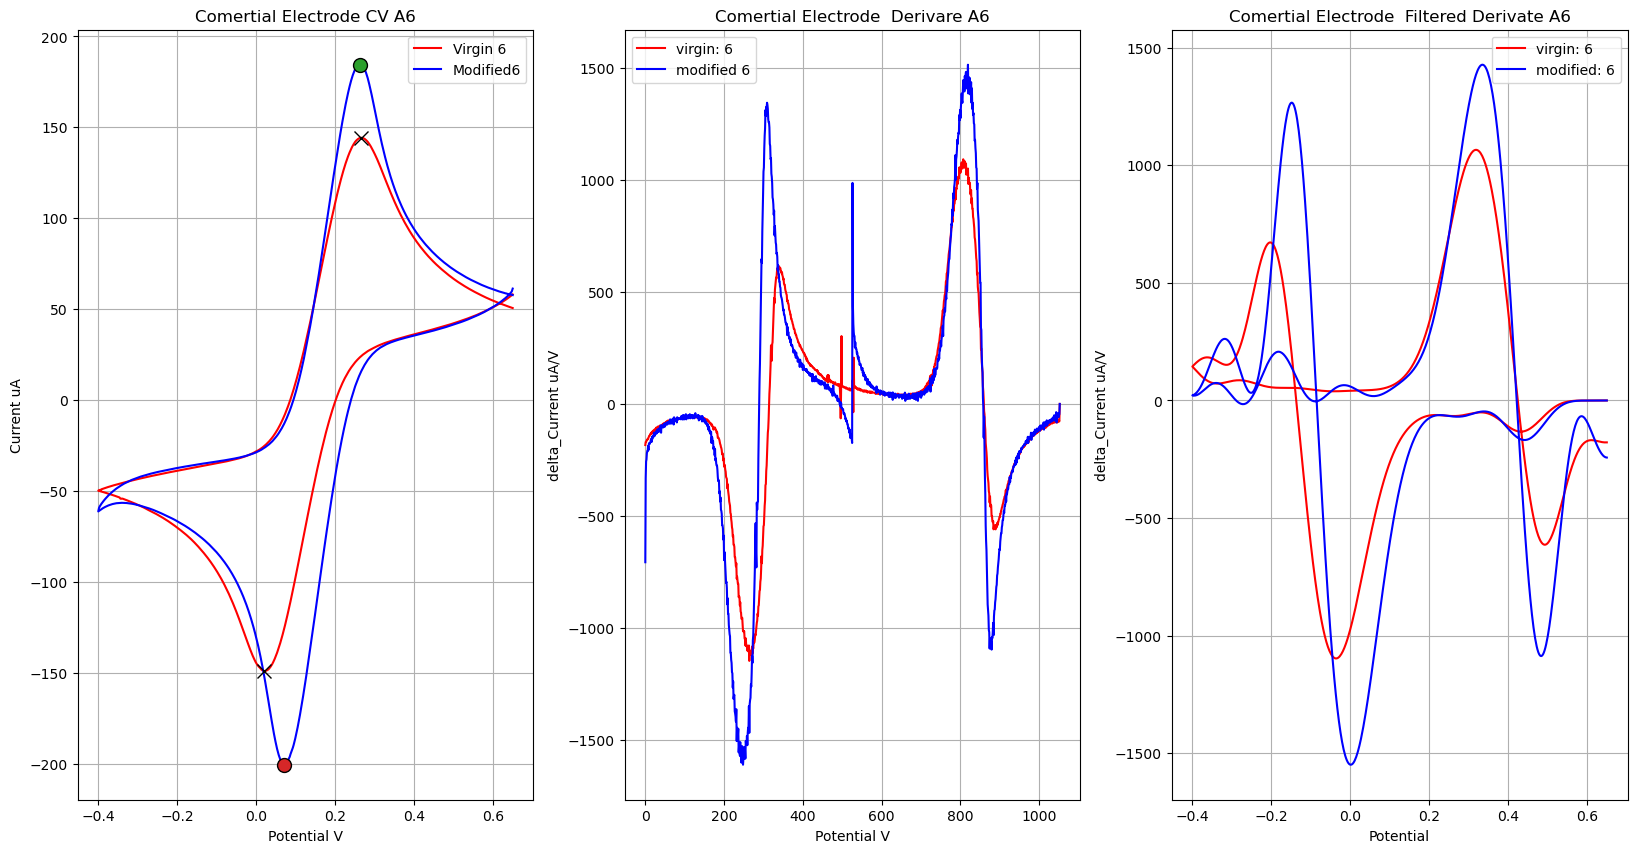

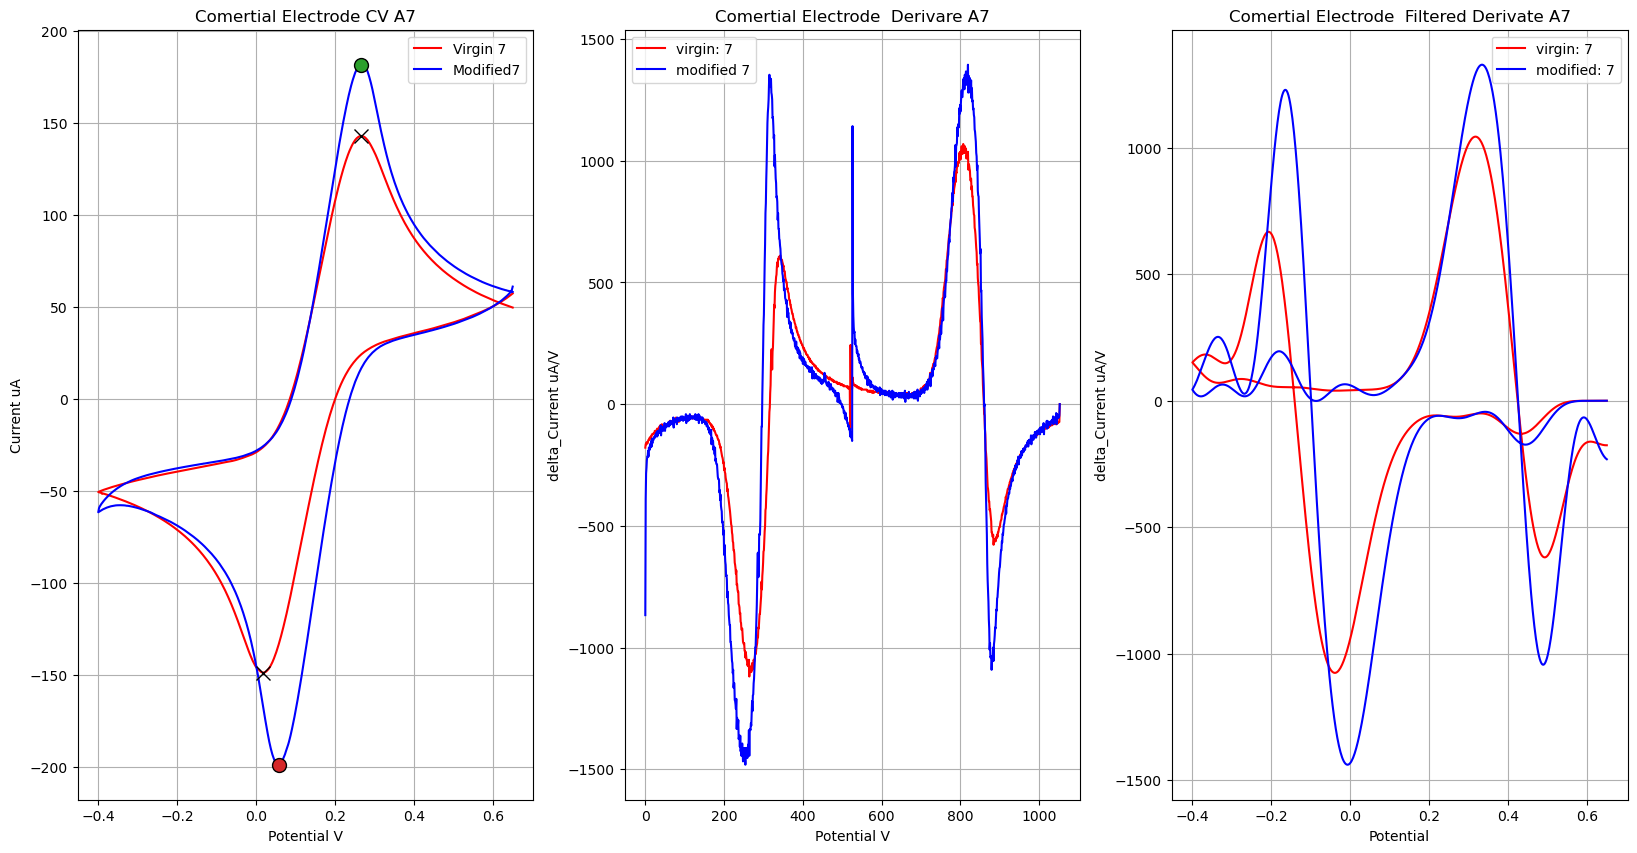

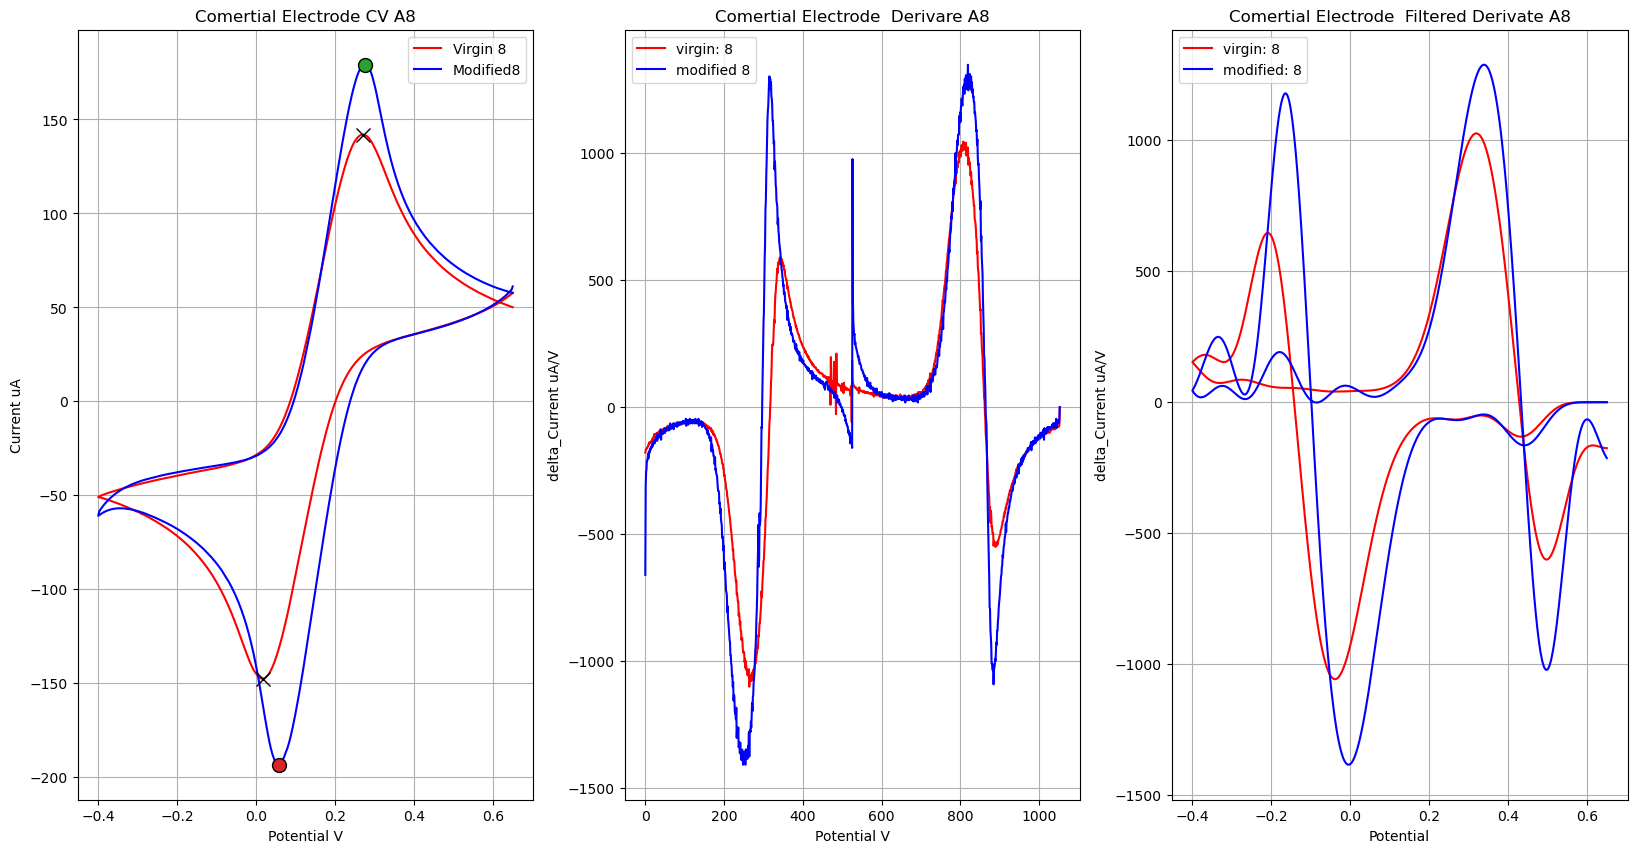

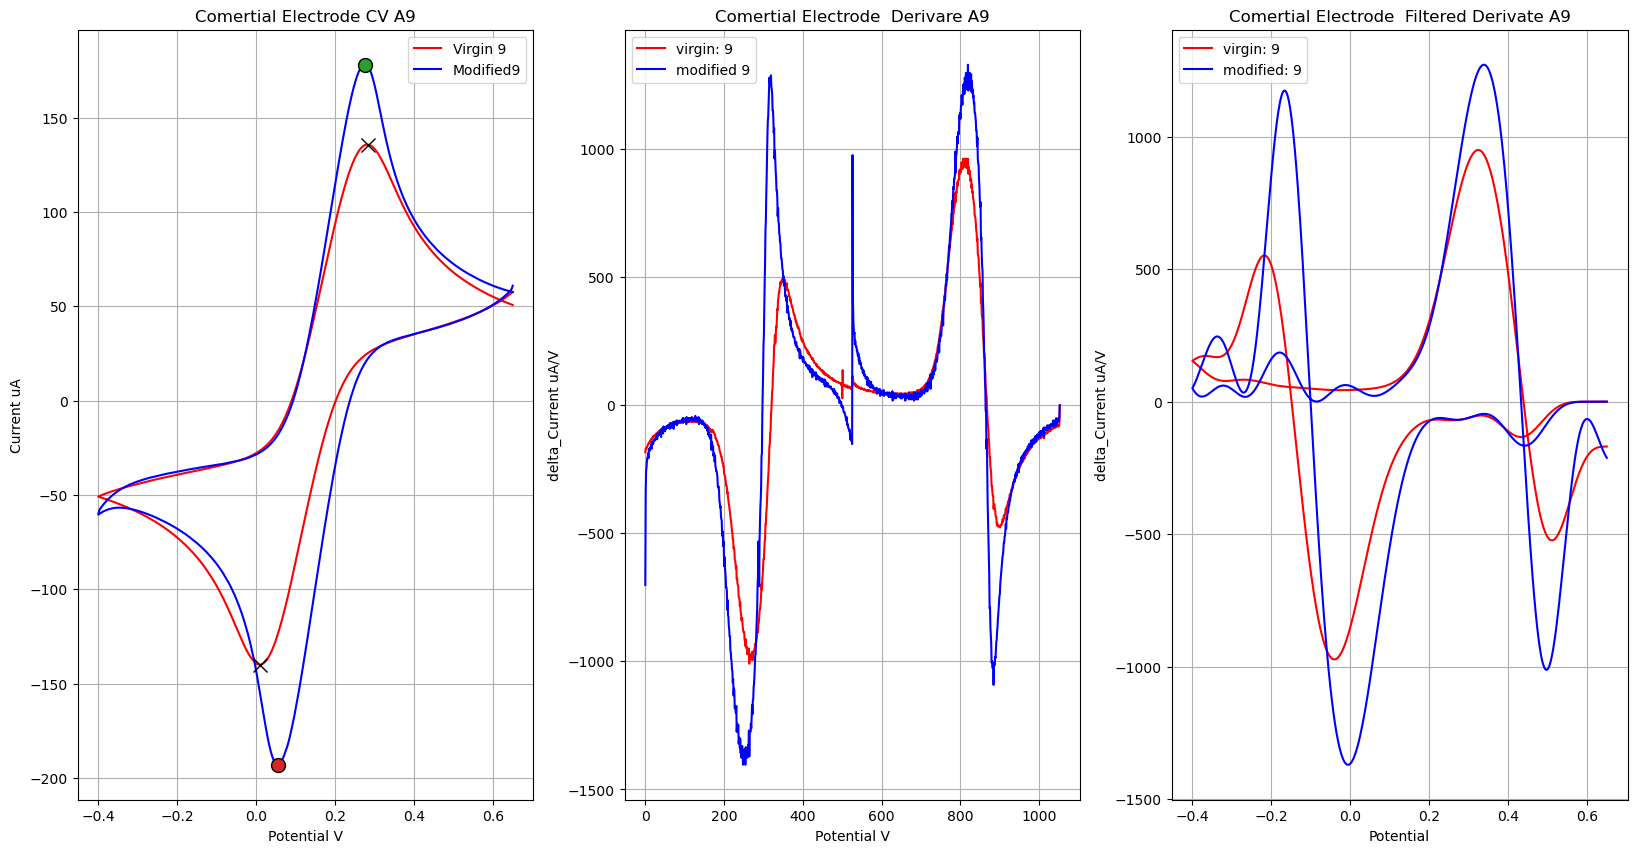

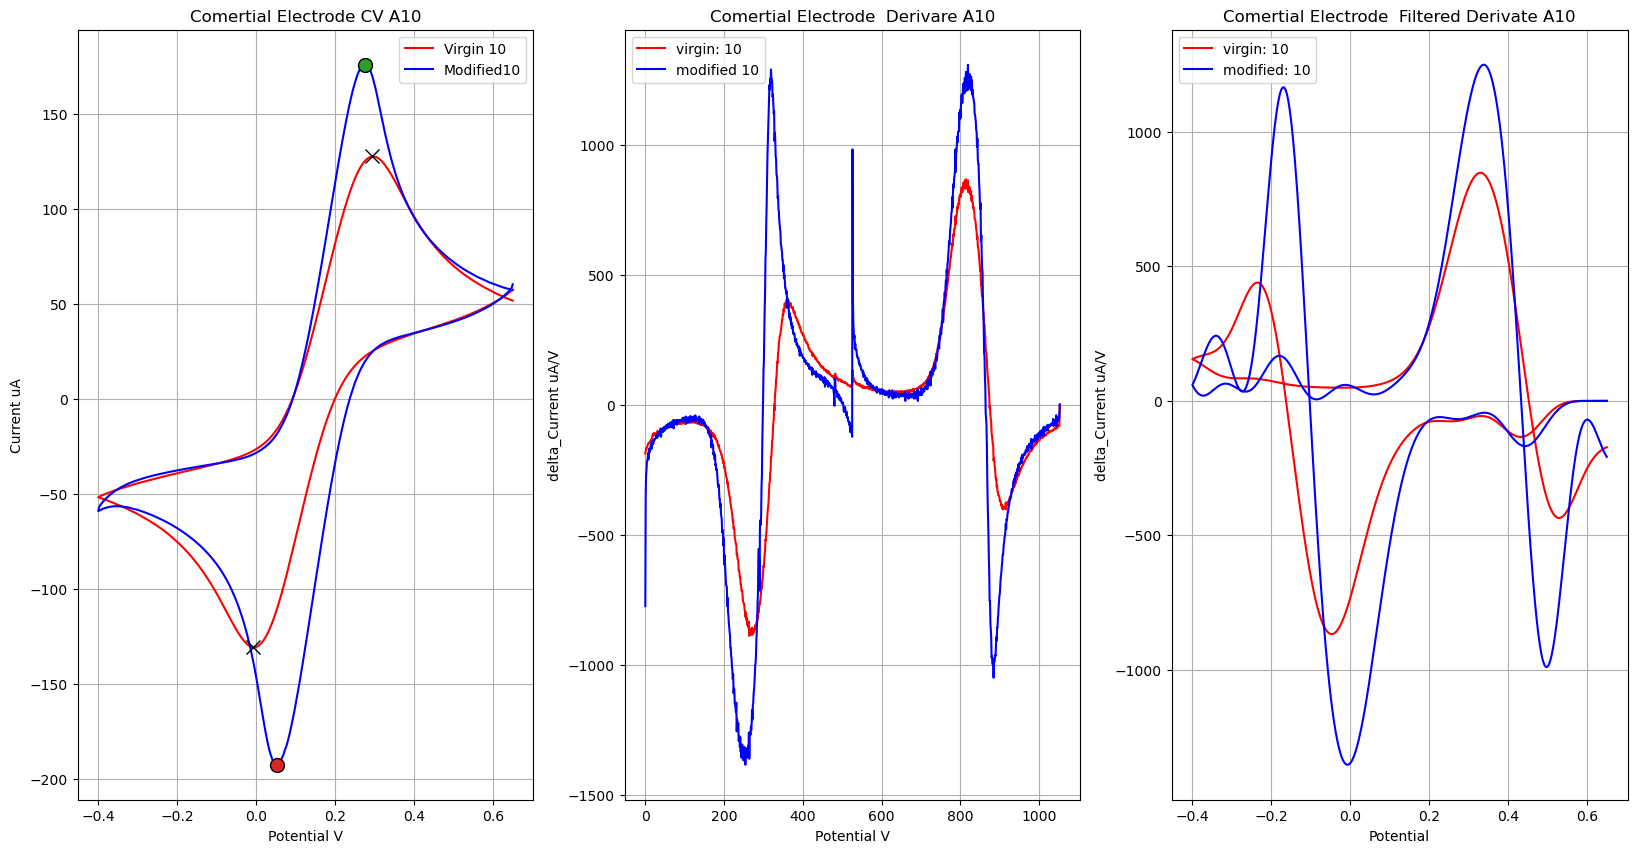

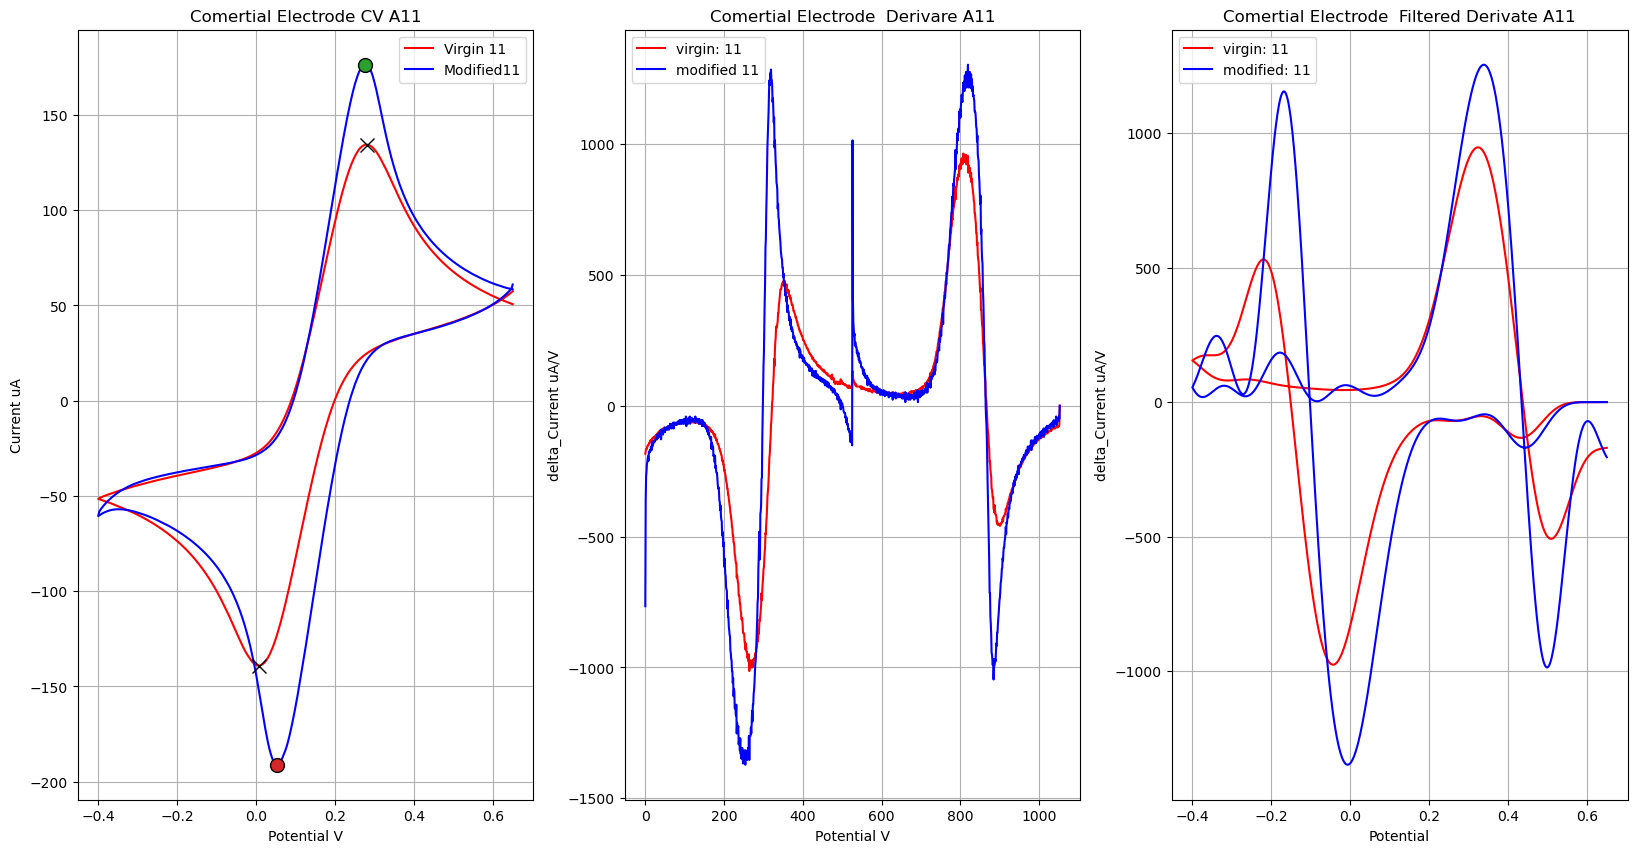

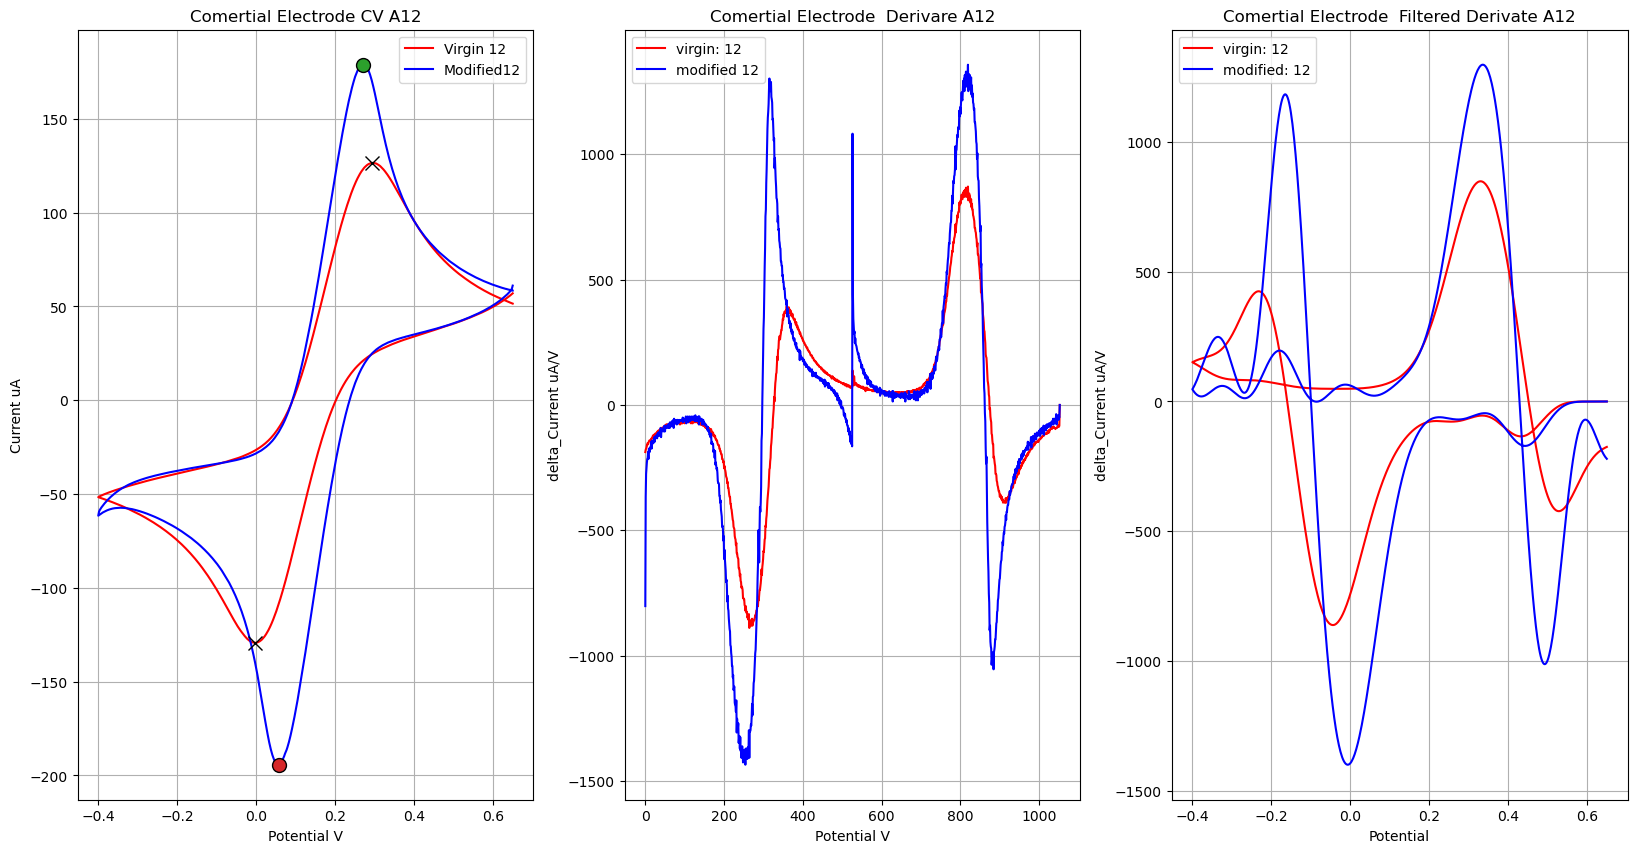

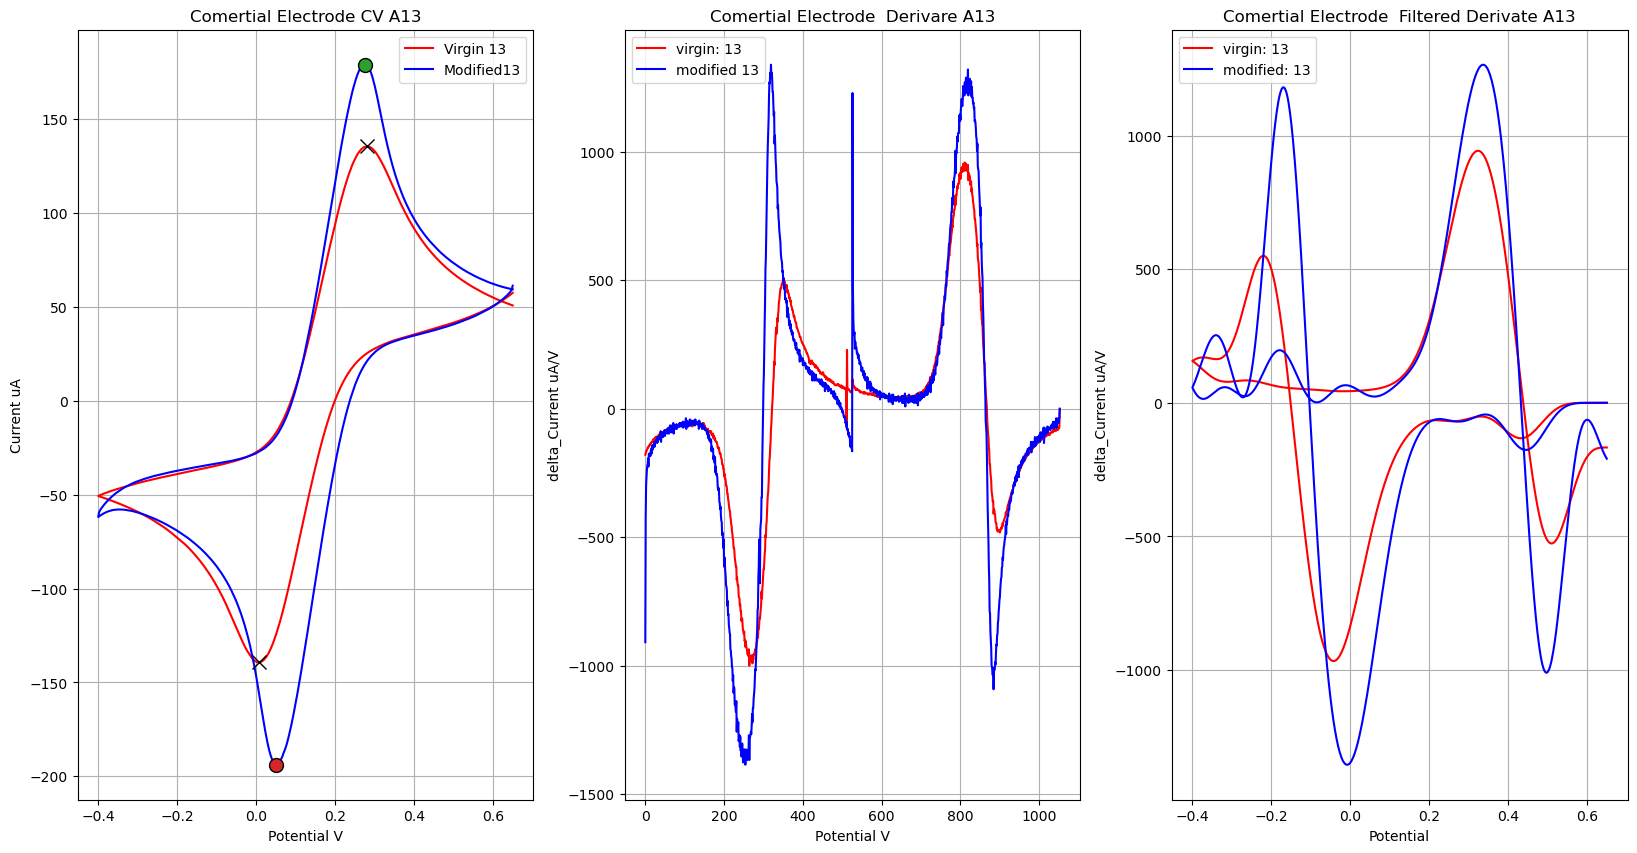

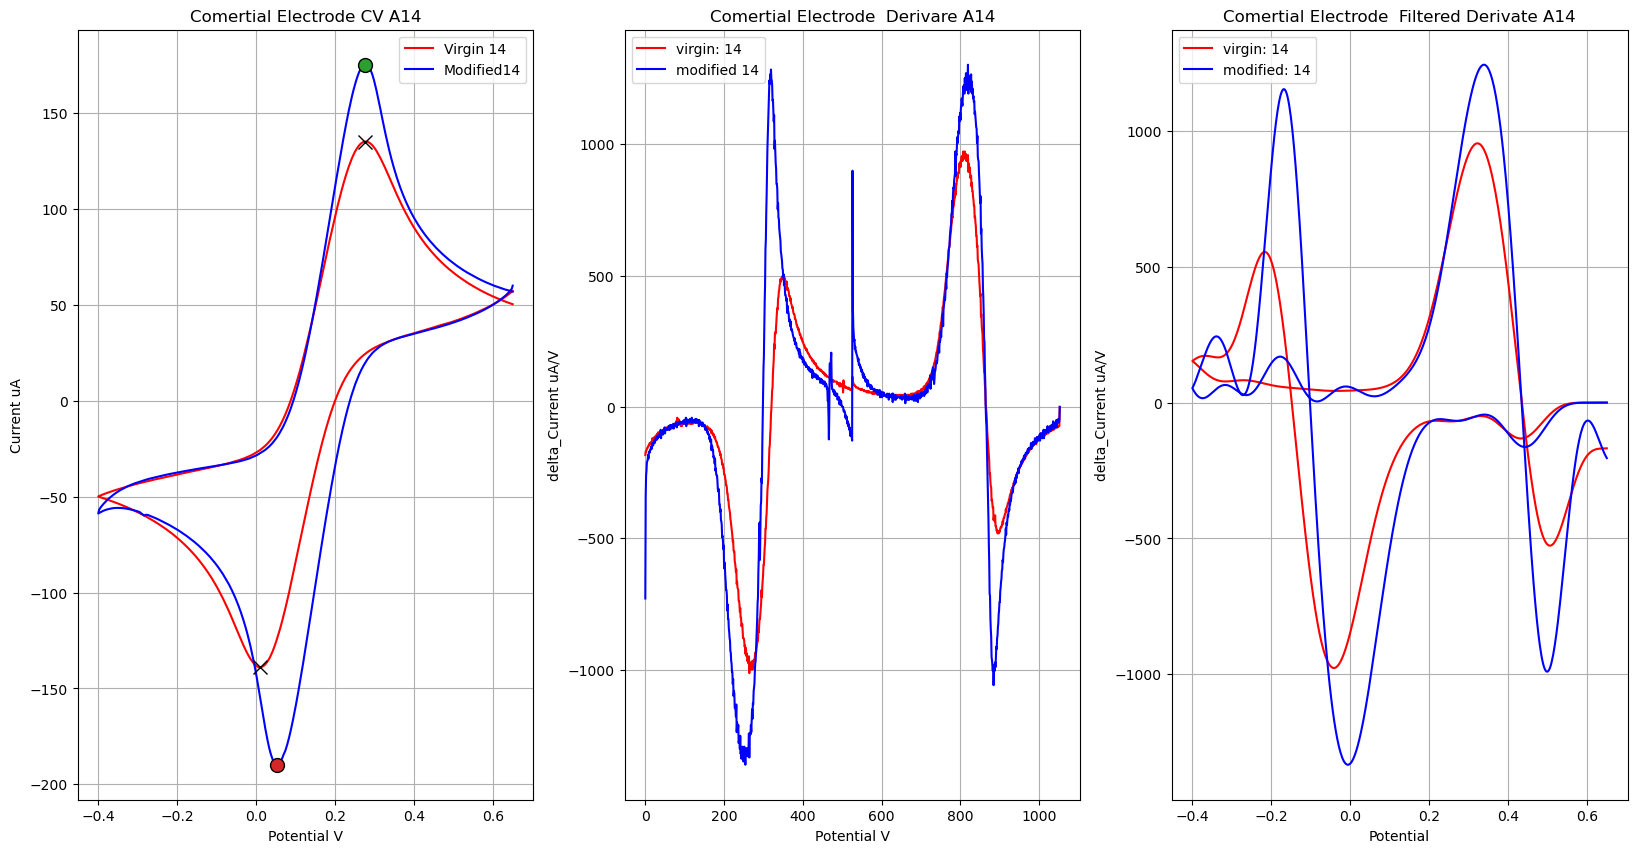

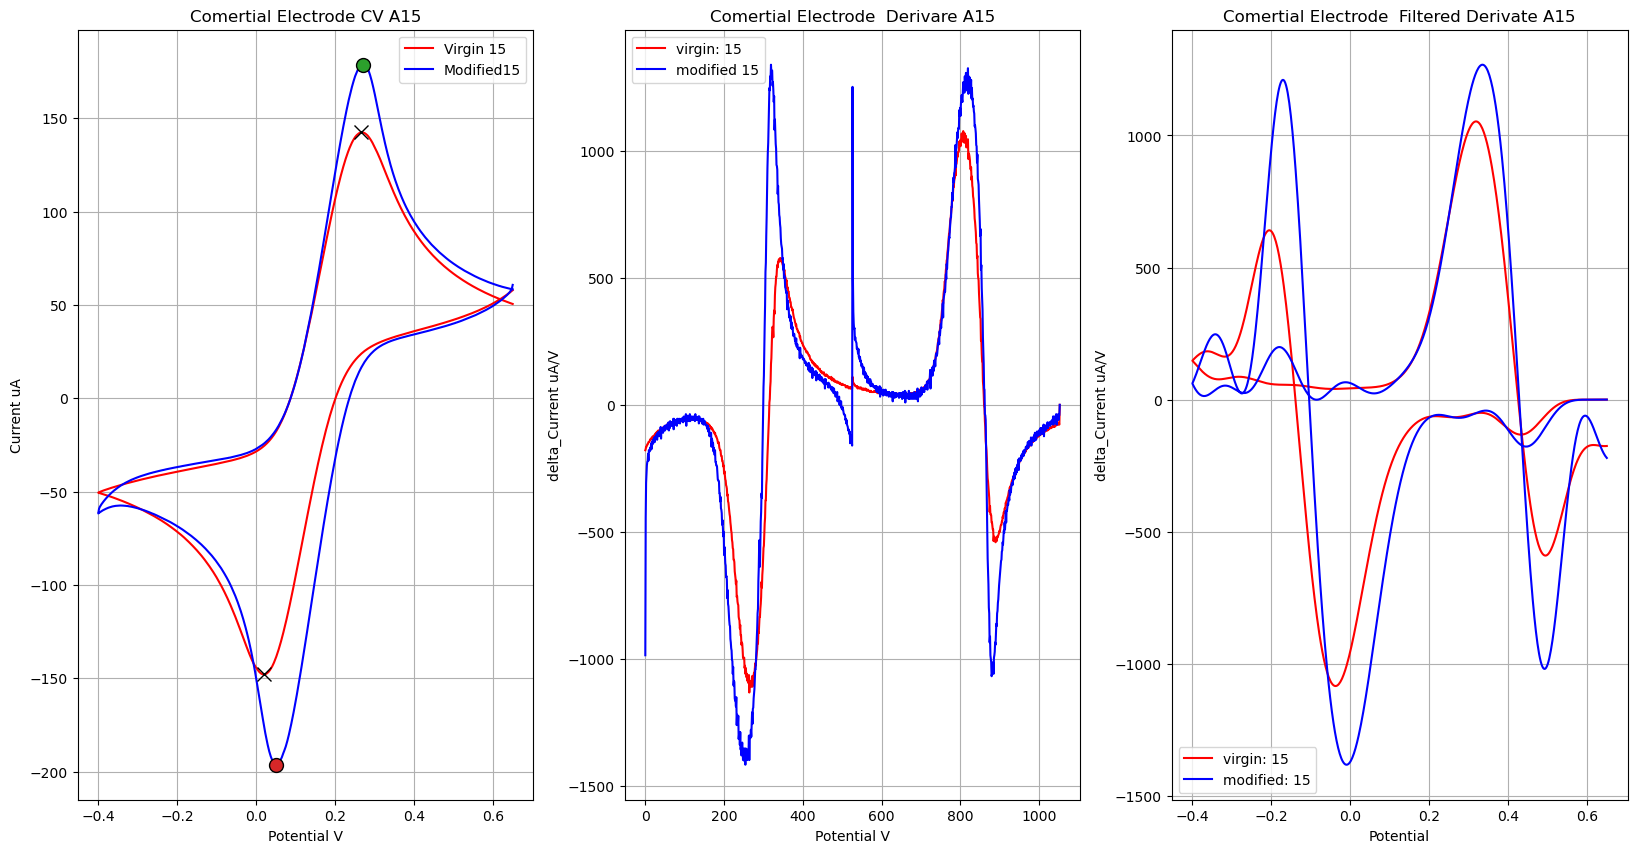

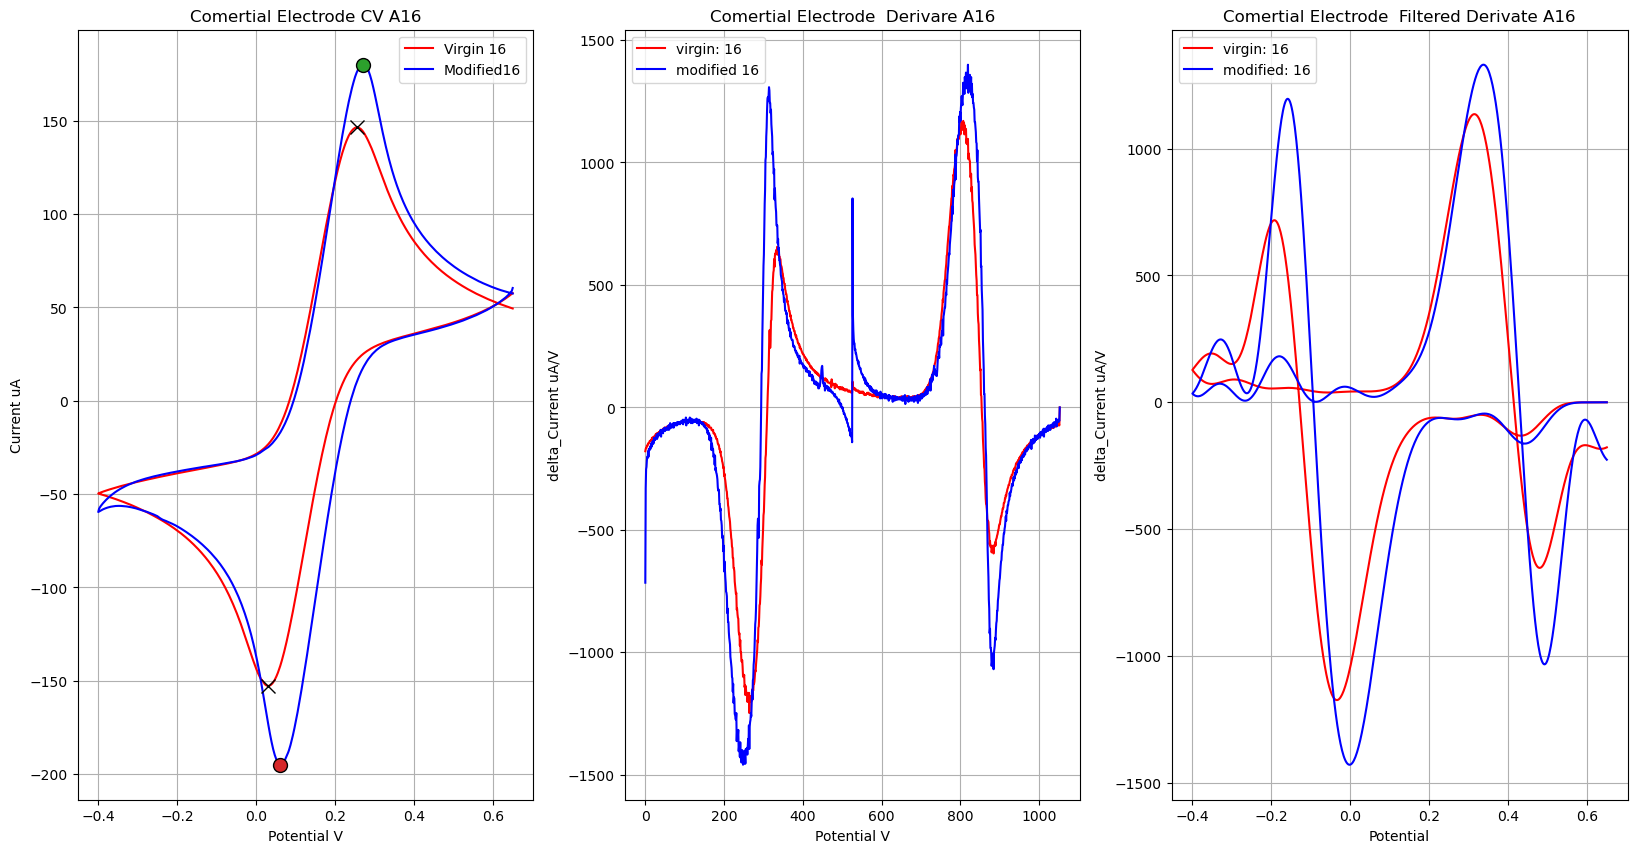

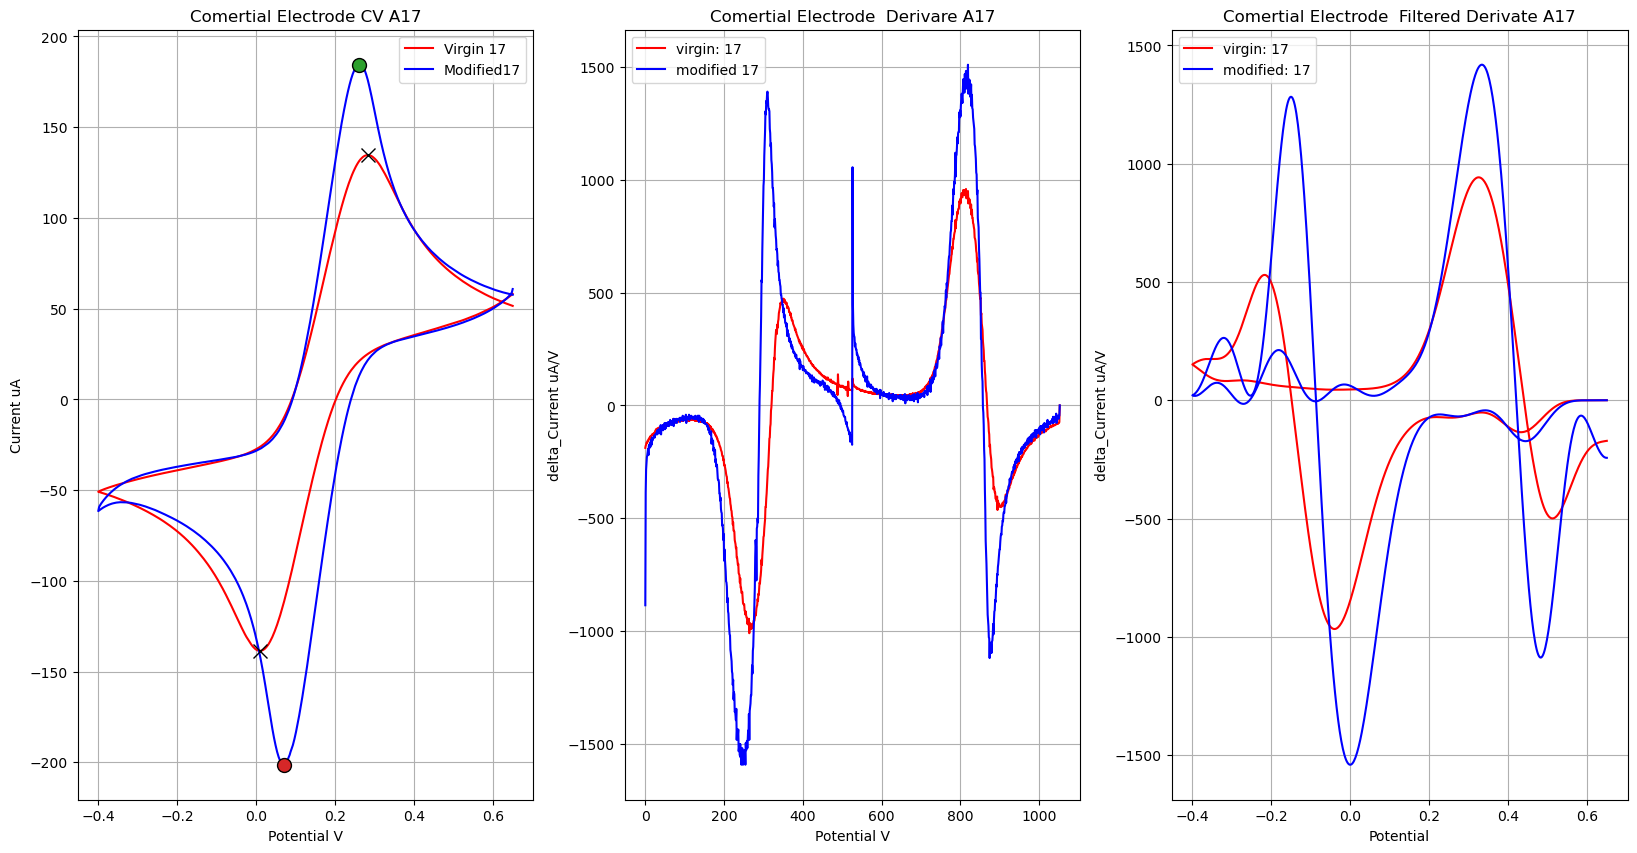

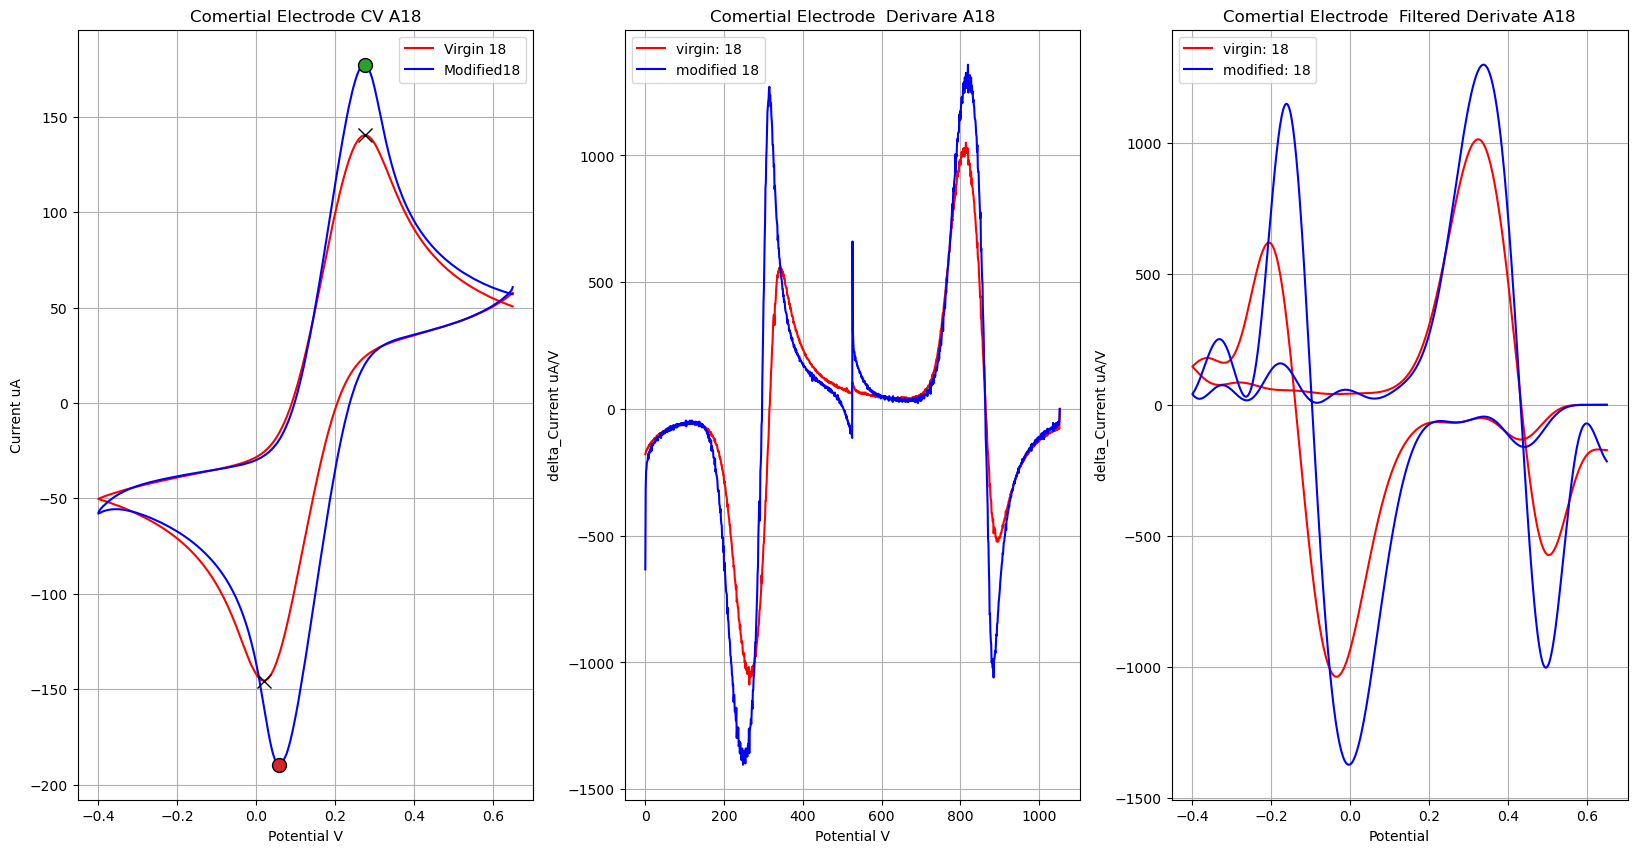

In [44]:
# Dados de eletrodos comerciais sem rodamina
comertial_elec_derivate = pd.DataFrame(columns=comertial_electrode.columns)
comertial_elec_anodic_current = []
comertial_elec_cathodic_current = []
comertial_elec_diff_ano_cat_potential = []
comertial_elec_diff_ano_cat_current = []
potential_comertial_elec = comertial_electrode.loc[:, comertial_electrode.columns[0]].values

# Dados de eletrodos comerciais com rodamina
comertial_elec_derivate_rod = pd.DataFrame(columns=comertial_rodamine.columns)
comertial_elec_anodic_current_rod = []
comertial_elec_cathodic_current_rod = []
comertial_elec_diff_ano_cat_potential_rod = []
comertial_elec_diff_ano_cat_current_rod = []
potential_comertial_elec_rod = comertial_rodamine.loc[:, comertial_rodamine.columns[0]].values

fp = findpeaks(method='peakdetect', lookahead=10)

plot_peak = False
plot_peak_rod = False

for i in range (1, comertial_electrode.shape[1]):
    
    current = comertial_electrode.iloc[:, i].values
    current_rod = comertial_rodamine.iloc[:, i].values

    current_derivate, derived_current_filtered = derivate(potential_comertial_elec, current)
    current_derivate_rod, derived_current_filtered_rod = derivate(potential_comertial_elec_rod, current_rod)

    comertial_elec_derivate[comertial_electrode.columns[i]] = derived_current_filtered
    comertial_elec_derivate_rod[comertial_rodamine.columns[i]] = derived_current_filtered_rod

    (anodic, cathodic) = getAnodicAndCathodicArguments(current, fp, ox_inf = 800, ox_sup = 900, red_inf = 200, red_sup = 400)
    (anodic_rod, cathodic_rod) = getAnodicAndCathodicArguments(current_rod, fp, ox_inf = 780, ox_sup = 900, red_inf = 200, red_sup = 350)
    
    if (anodic_rod != -1 and cathodic_rod != -1):
        comertial_elec_anodic_current_rod.append(current_rod[anodic_rod])
        comertial_elec_cathodic_current_rod.append(current_rod[cathodic_rod])
        comertial_elec_diff_ano_cat_current_rod.append(abs(current_rod[anodic_rod] - current_rod[cathodic_rod]))
        comertial_elec_diff_ano_cat_potential_rod.append(abs(potential_comertial_elec_rod[anodic_rod] - potential_comertial_elec_rod[cathodic_rod]))
        plot_peak_rod = True
        
    elif (anodic_rod == -1):
         comertial_elec_anodic_current_rod.append(np.nan)
         comertial_elec_cathodic_current_rod.append(current_rod[cathodic_rod])
         comertial_elec_diff_ano_cat_current_rod.append(np.nan)
         comertial_elec_diff_ano_cat_potential_rod.append(np.nan)
         
    elif (cathodic_rod == -1):
        comertial_elec_anodic_current_rod.append(current_rod[anodic_rod])
        comertial_elec_cathodic_current_rod.append(np.nan)
        comertial_elec_diff_ano_cat_current_rod.append(np.nan)
        comertial_elec_diff_ano_cat_potential_rod.append(np.nan)
    
    
    if (anodic != -1 and cathodic != -1):
        comertial_elec_anodic_current.append(current[anodic])
        comertial_elec_cathodic_current.append(current[cathodic])
        comertial_elec_diff_ano_cat_current.append(abs(current[anodic] - current[cathodic]))
        comertial_elec_diff_ano_cat_potential.append(abs(potential_comertial_elec[anodic] - potential_comertial_elec[cathodic]))
        plot_peak = True
        
    elif (anodic == -1):
         comertial_elec_anodic_current.append(np.nan)
         comertial_elec_cathodic_current.append(current[cathodic])
         comertial_elec_diff_ano_cat_current.append(np.nan)
         comertial_elec_diff_ano_cat_potential.append(np.nan)
         
    elif (cathodic == -1):
        comertial_elec_anodic_current.append(current[anodic])
        comertial_elec_cathodic_current.append(np.nan)
        comertial_elec_diff_ano_cat_current.append(np.nan)
        comertial_elec_diff_ano_cat_potential.append(np.nan)

 
    fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3,figsize=(20,10))
    ax1.set_title("Comertial Electrode CV " + comertial_electrode.columns[i])
    ax1.set_ylabel("Current uA")
    ax1.set_xlabel("Potential V")
    ax1.grid(True)
        
    ax2.set_title("Comertial Electrode  Derivare " + comertial_electrode.columns[i])
    ax2.set_ylabel("delta_Current uA/V")
    ax2.set_xlabel("Potential V")
        
    ax2.grid(True)
        
    ax3.set_title("Comertial Electrode  Filtered Derivate " + comertial_electrode.columns[i])
    ax3.set_ylabel("delta_Current uA/V")
    ax3.set_xlabel("Potential")
        
    ax3.grid(True)
        
          
    ax1.plot(potential_comertial_elec, current, color='r', label="Virgin " + str(i))
    ax1.plot(potential_comertial_elec, current_rod, color='b', label="Modified" + str(i))

    if (plot_peak):
        ax1.plot(potential_comertial_elec[anodic], current[anodic], marker="x", markersize=10, markeredgecolor="black")
        ax1.plot(potential_comertial_elec[cathodic], current[cathodic], marker="x", markersize=10, markeredgecolor="black")

    if (plot_peak_rod):
        ax1.plot(potential_comertial_elec_rod[anodic_rod], current_rod[anodic_rod], marker="o", markersize=10, markeredgecolor="black")
        ax1.plot(potential_comertial_elec_rod[cathodic_rod], current_rod[cathodic_rod], marker="o", markersize=10, markeredgecolor="black")
        
    ax1.legend() 
    ax2.plot(current_derivate, color='r', label="virgin: " + str(i))
    ax2.plot(current_derivate_rod, color='b', label="modified " + str(i))
    ax2.legend()
    #ax3.plot(potential_neg, derived_current_filtered, color=colors[plots], label="case: " + str(plots + 1))
    ax3.plot(potential_comertial_elec, derived_current_filtered, color='r', label="virgin: " + str(i))
    ax3.plot(potential_comertial_elec, derived_current_filtered_rod, color='b', label="modified: " + str(i))
    ax3.legend() 
    plot_peak_rod = False
    plot_peak = False
    
plt.show()

### Observando em relação ao tempo

Critical frequency 0.35450746016672224
Critical frequency 0.35450746016672224
[findpeaks] >Finding peaks in 1d-vector using [peakdetect] method..
[findpeaks] >Finding peaks in 1d-vector using [peakdetect] method..
Critical frequency 0.35450746016672224
Critical frequency 0.35450746016672224
[findpeaks] >Finding peaks in 1d-vector using [peakdetect] method..
[findpeaks] >Finding peaks in 1d-vector using [peakdetect] method..
Critical frequency 0.35450746016672224
Critical frequency 0.35450746016672224
[findpeaks] >Finding peaks in 1d-vector using [peakdetect] method..
[findpeaks] >Finding peaks in 1d-vector using [peakdetect] method..
Critical frequency 0.35450746016672224
Critical frequency 0.35450746016672224
[findpeaks] >Finding peaks in 1d-vector using [peakdetect] method..
[findpeaks] >Finding peaks in 1d-vector using [peakdetect] method..
Critical frequency 0.35450746016672224
Critical frequency 0.35450746016672224
[findpeaks] >Finding peaks in 1d-vector using [peakdetect] method.

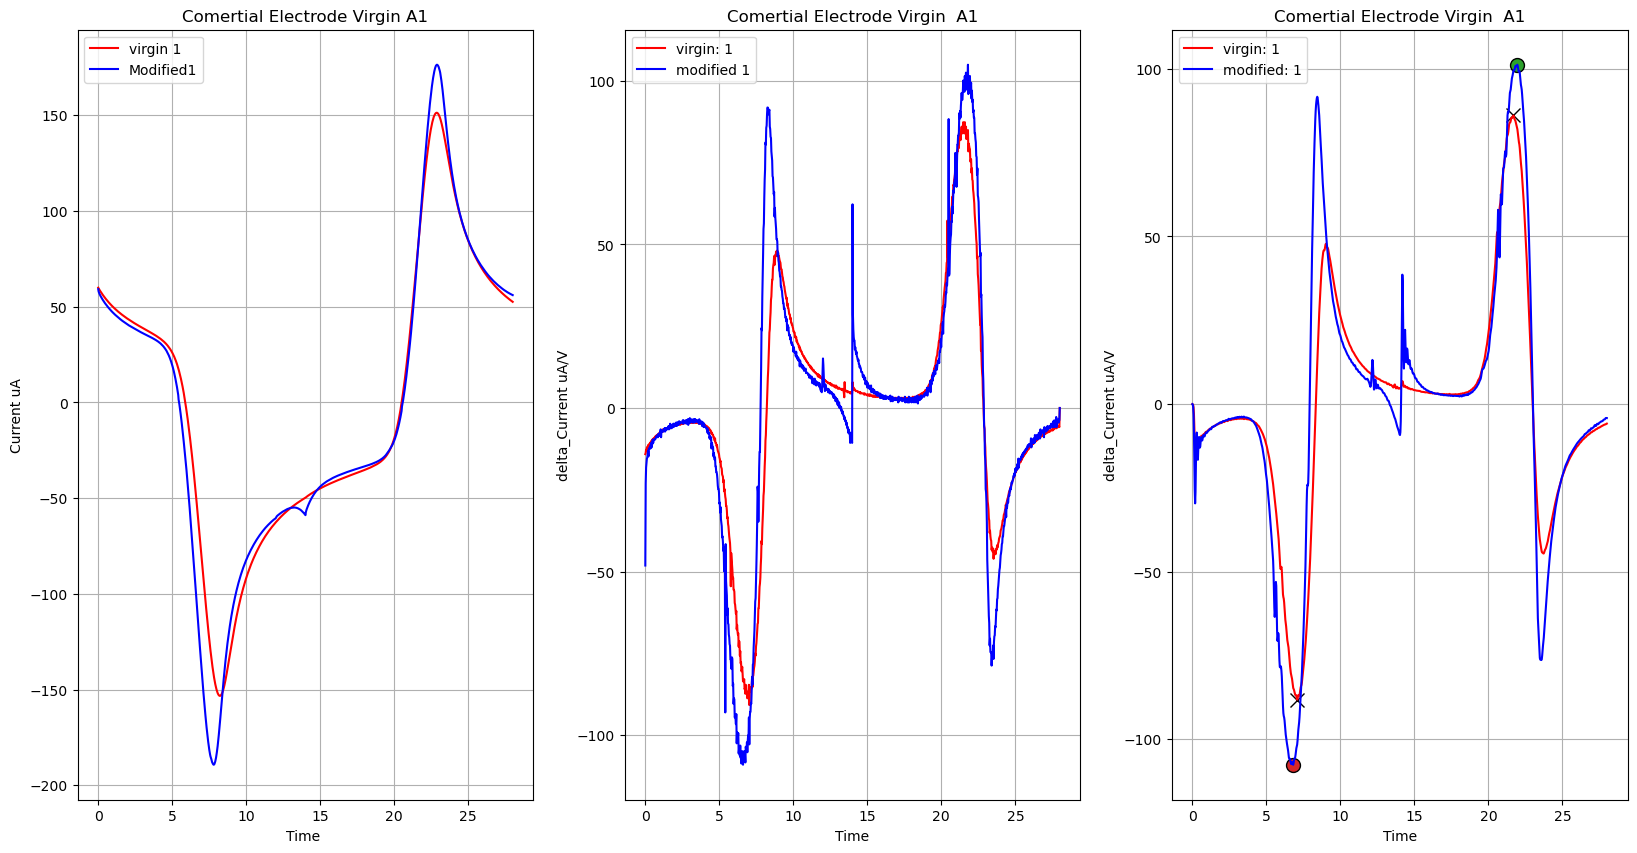

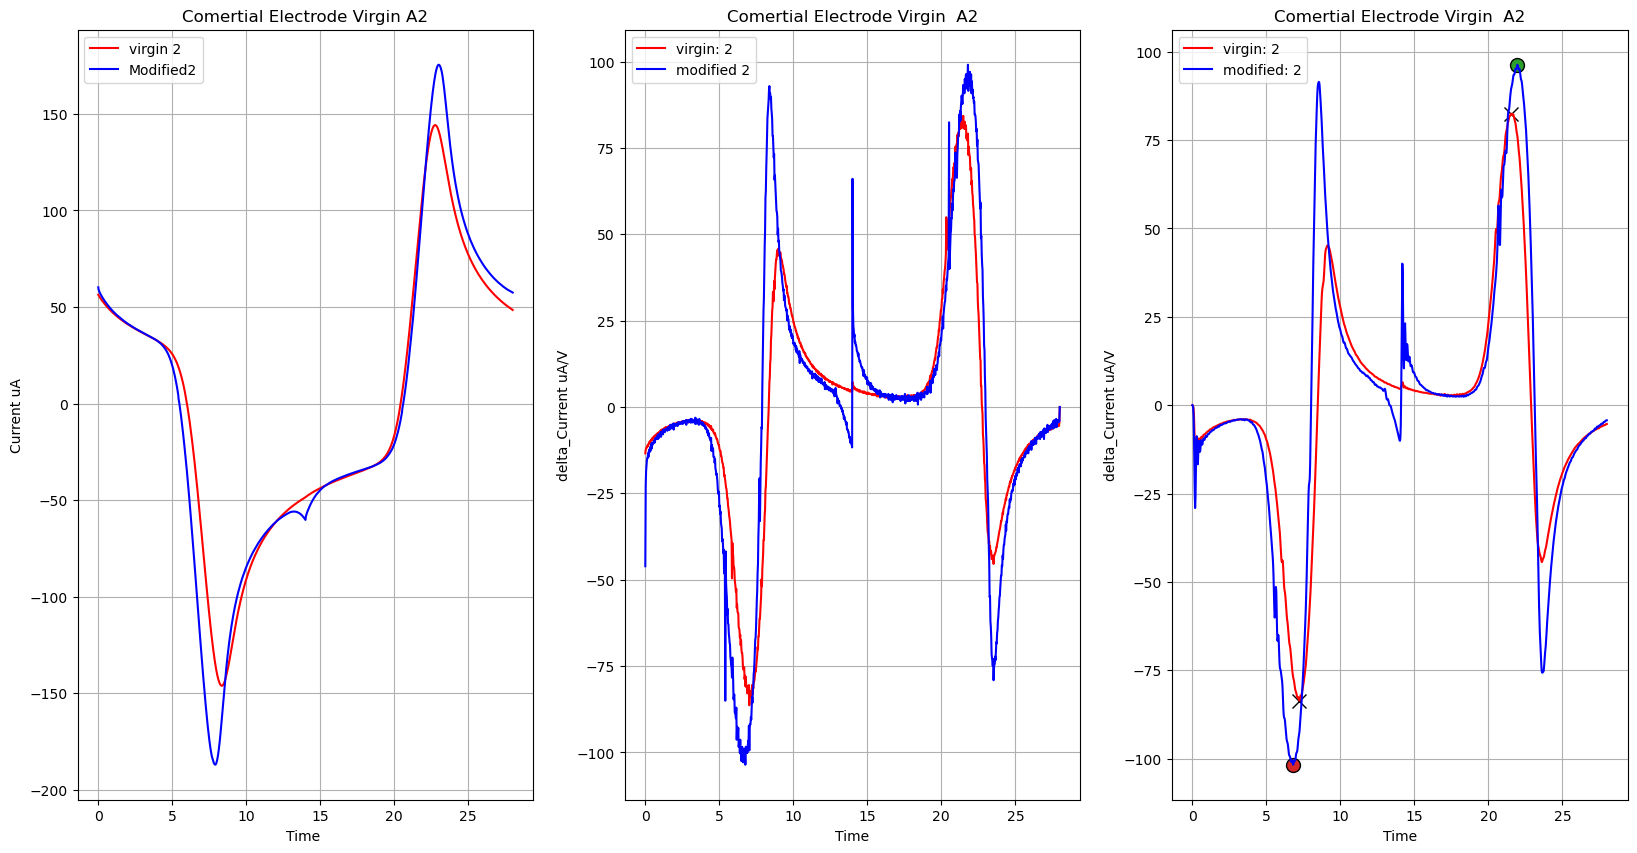

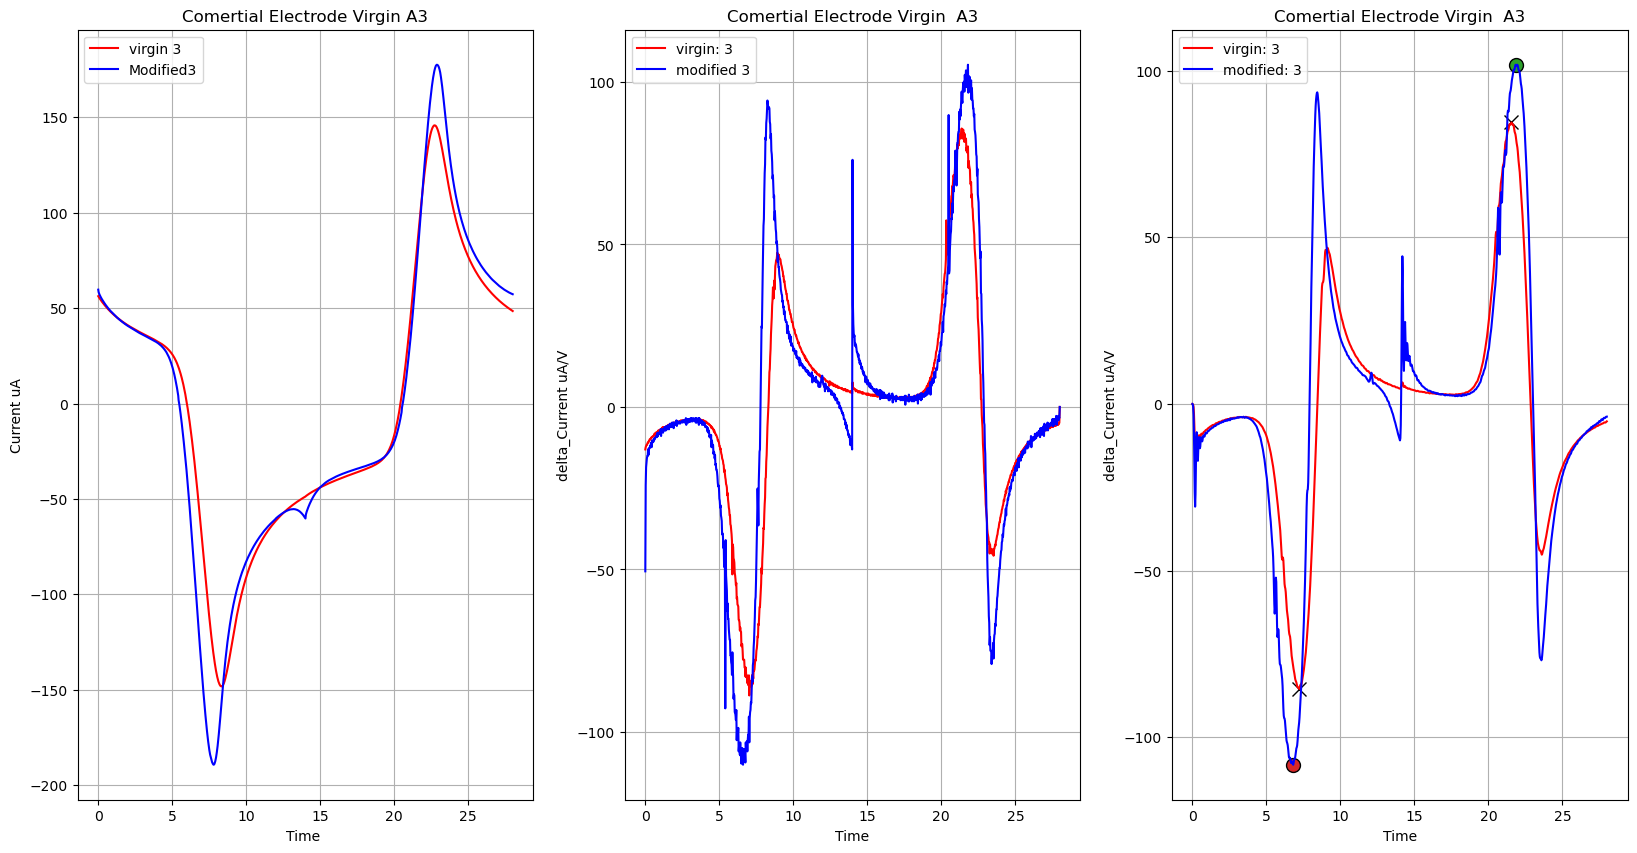

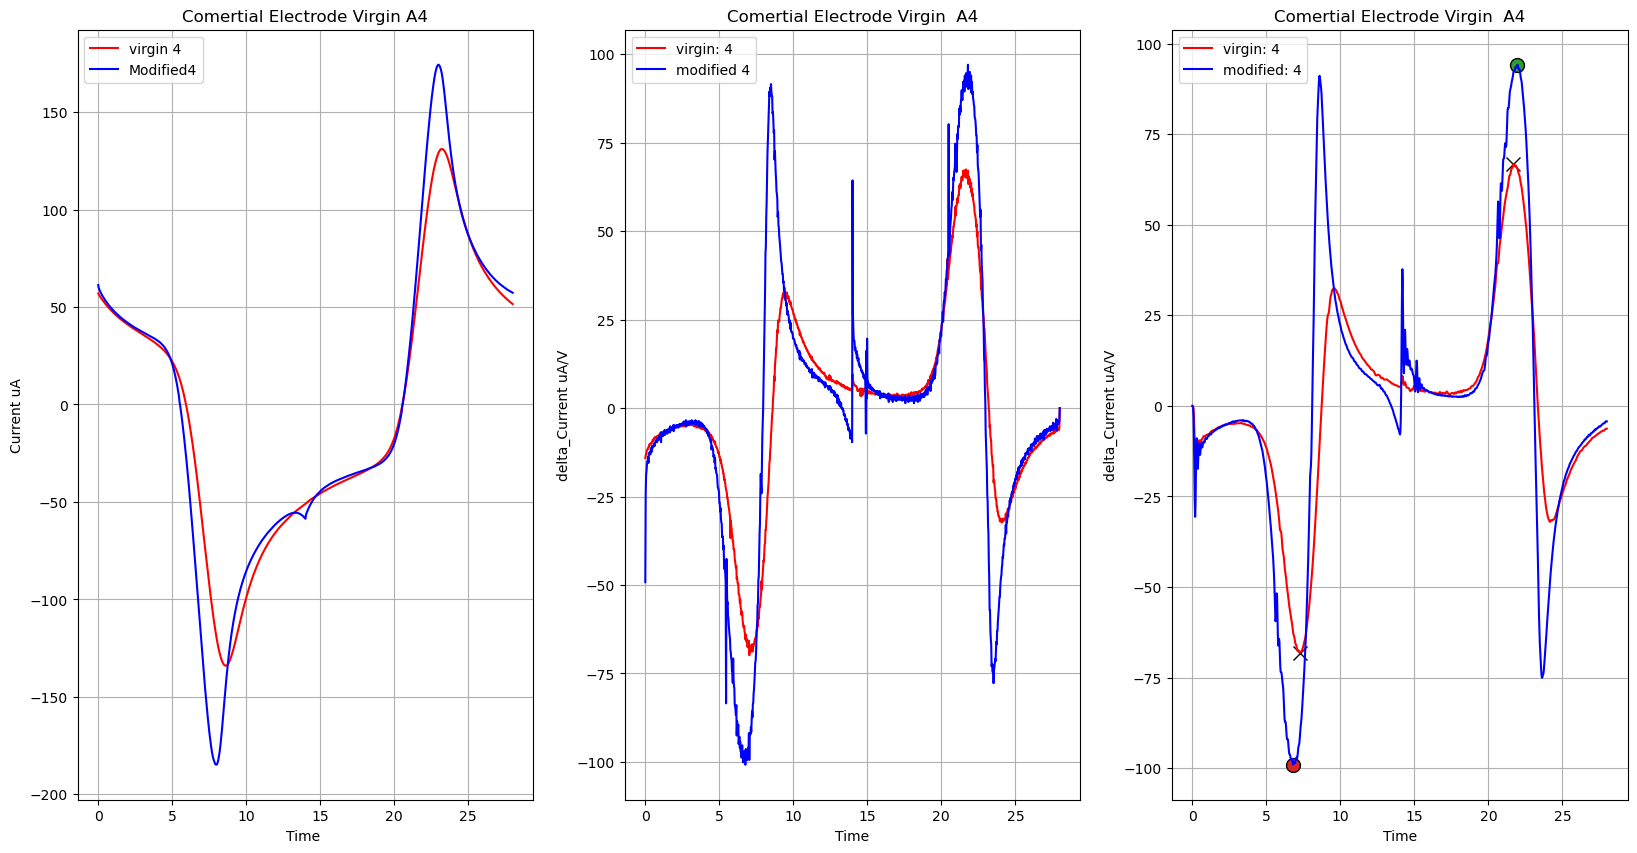

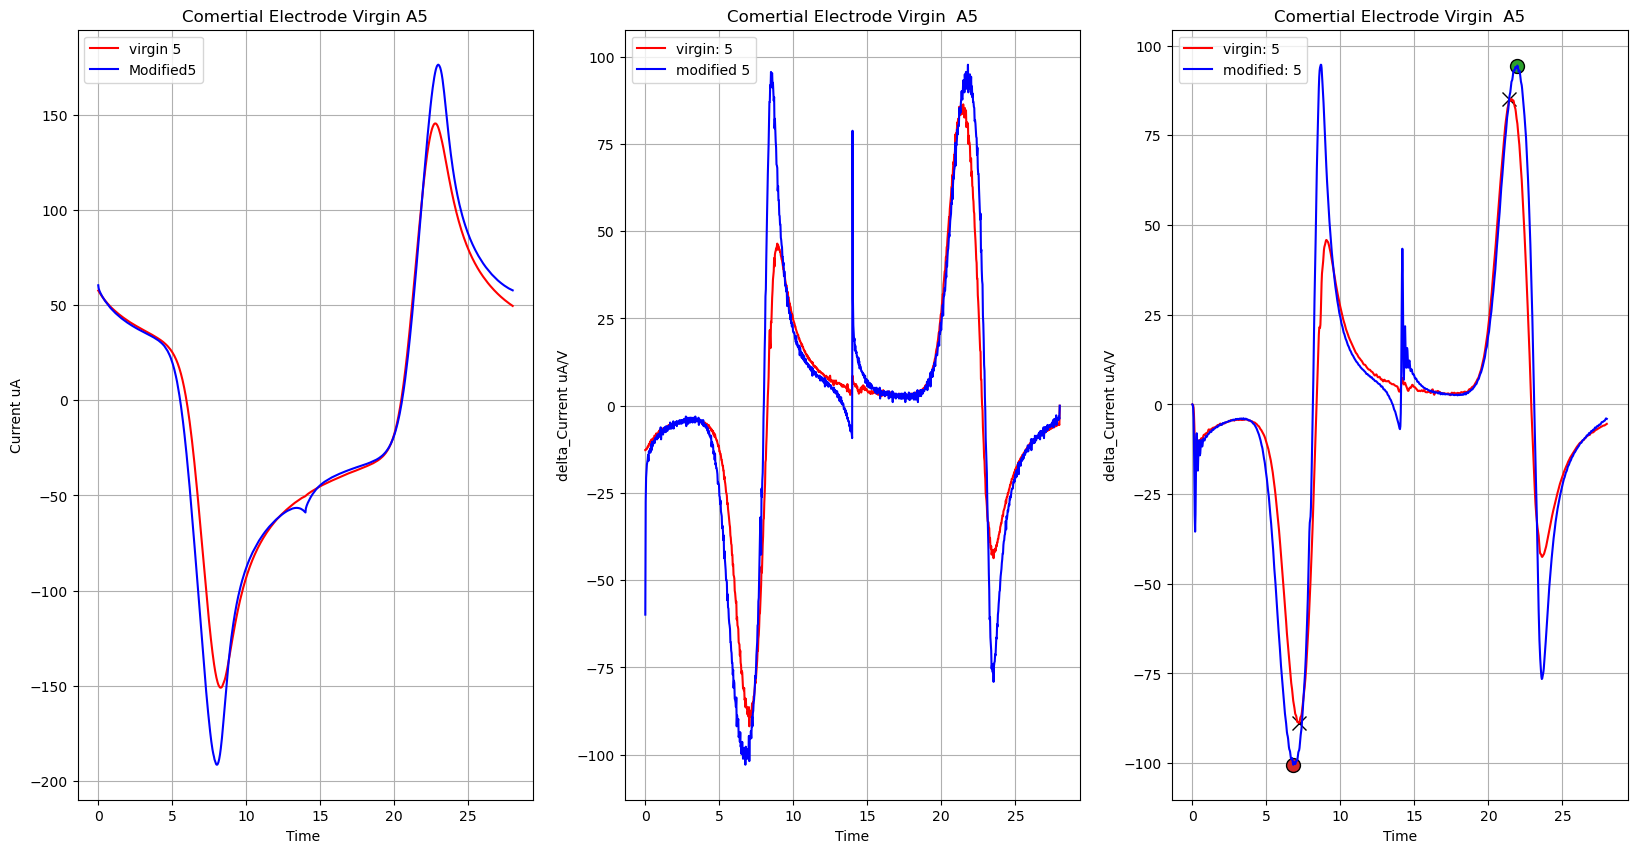

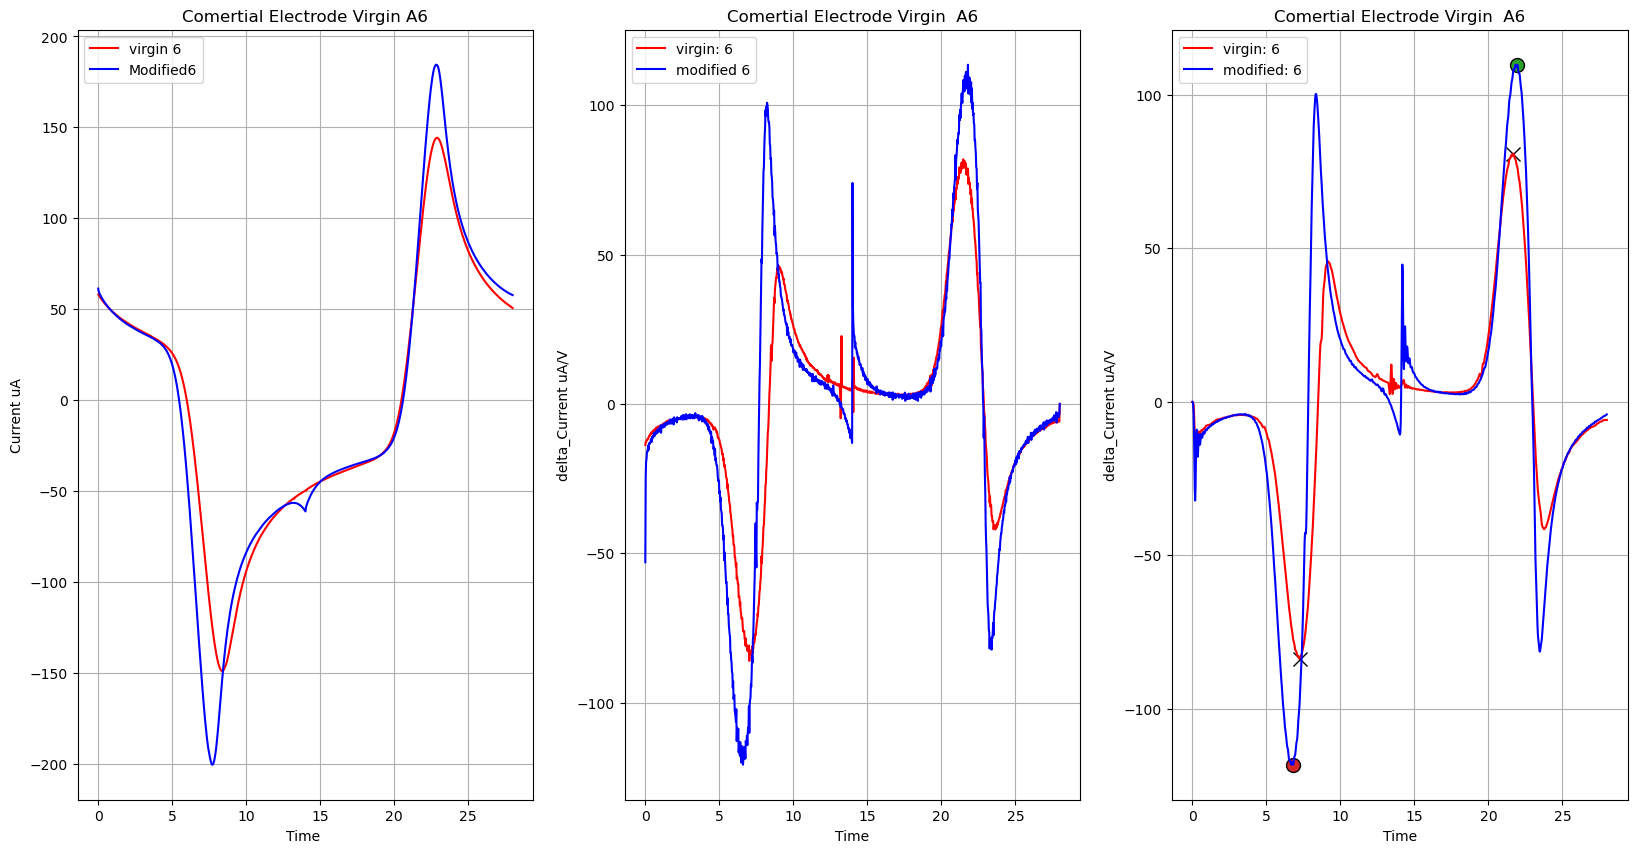

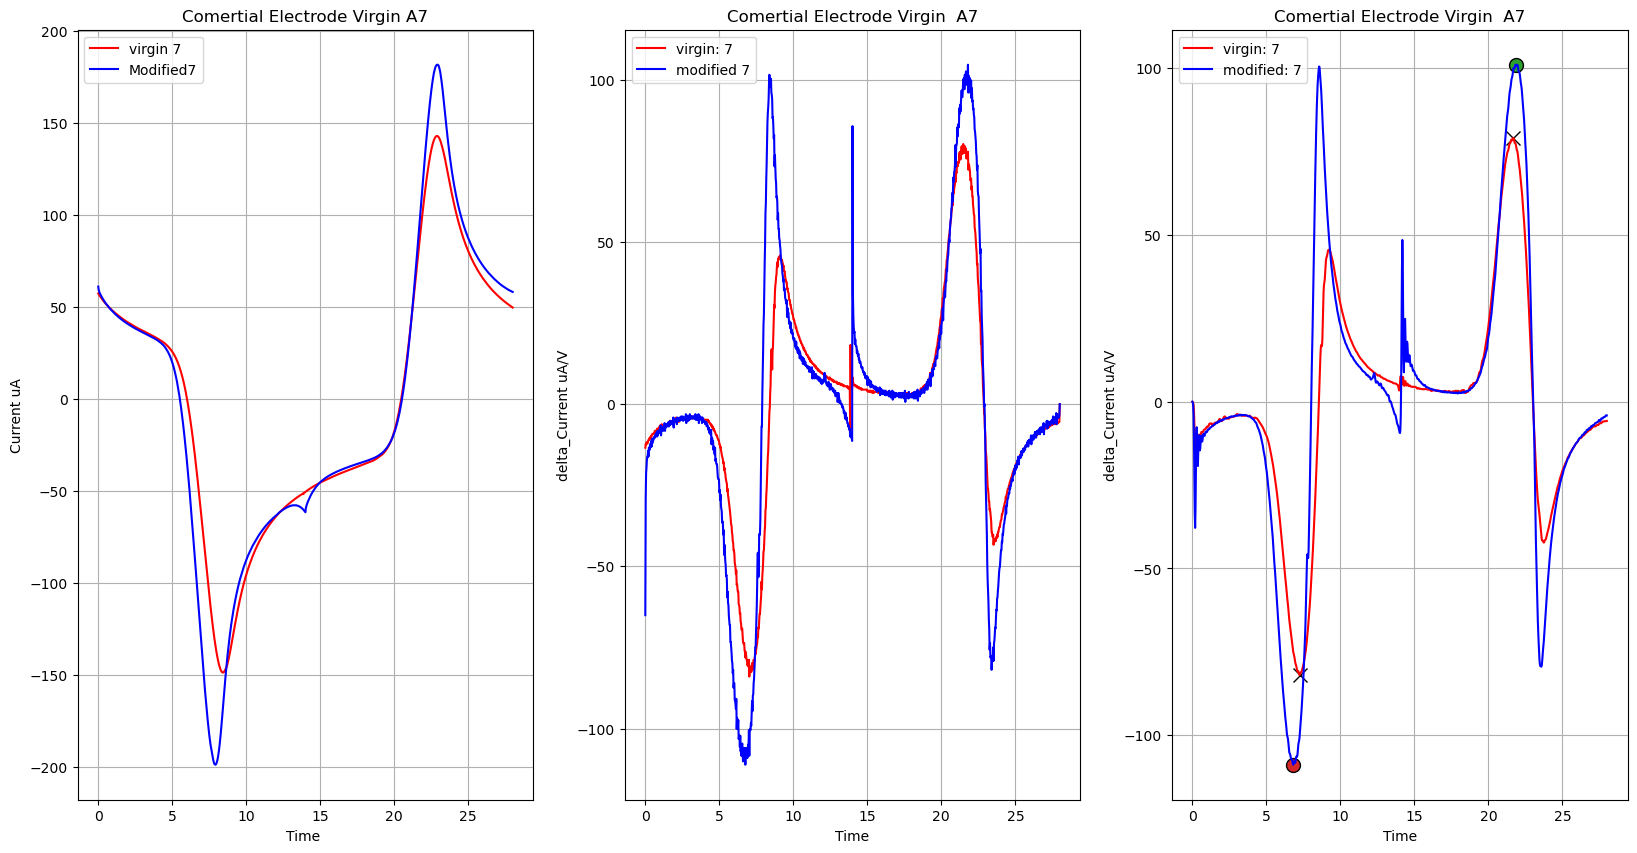

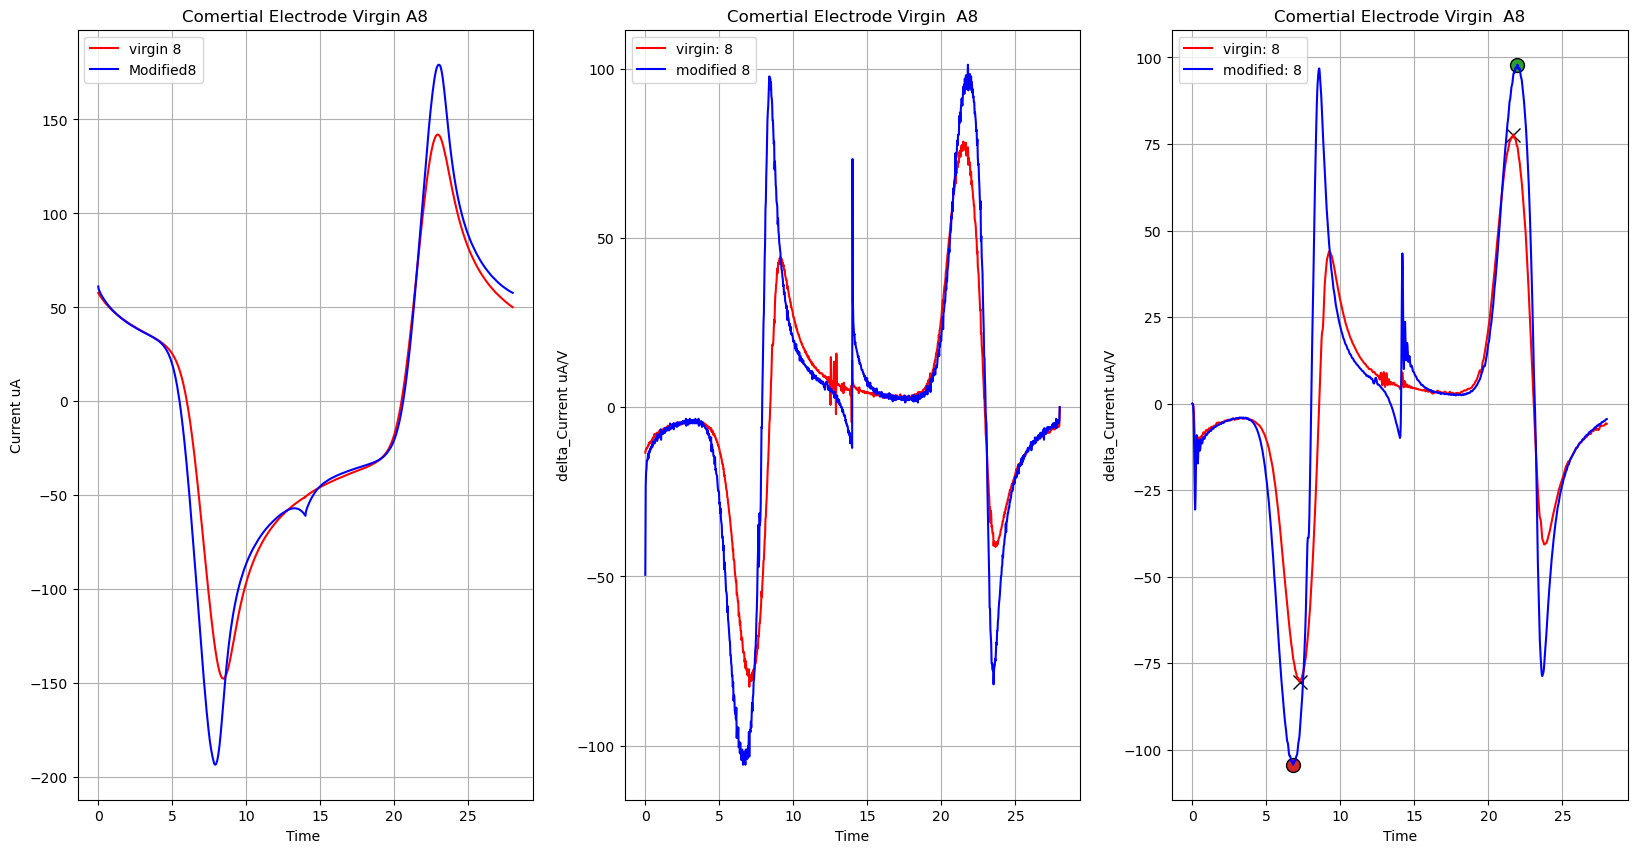

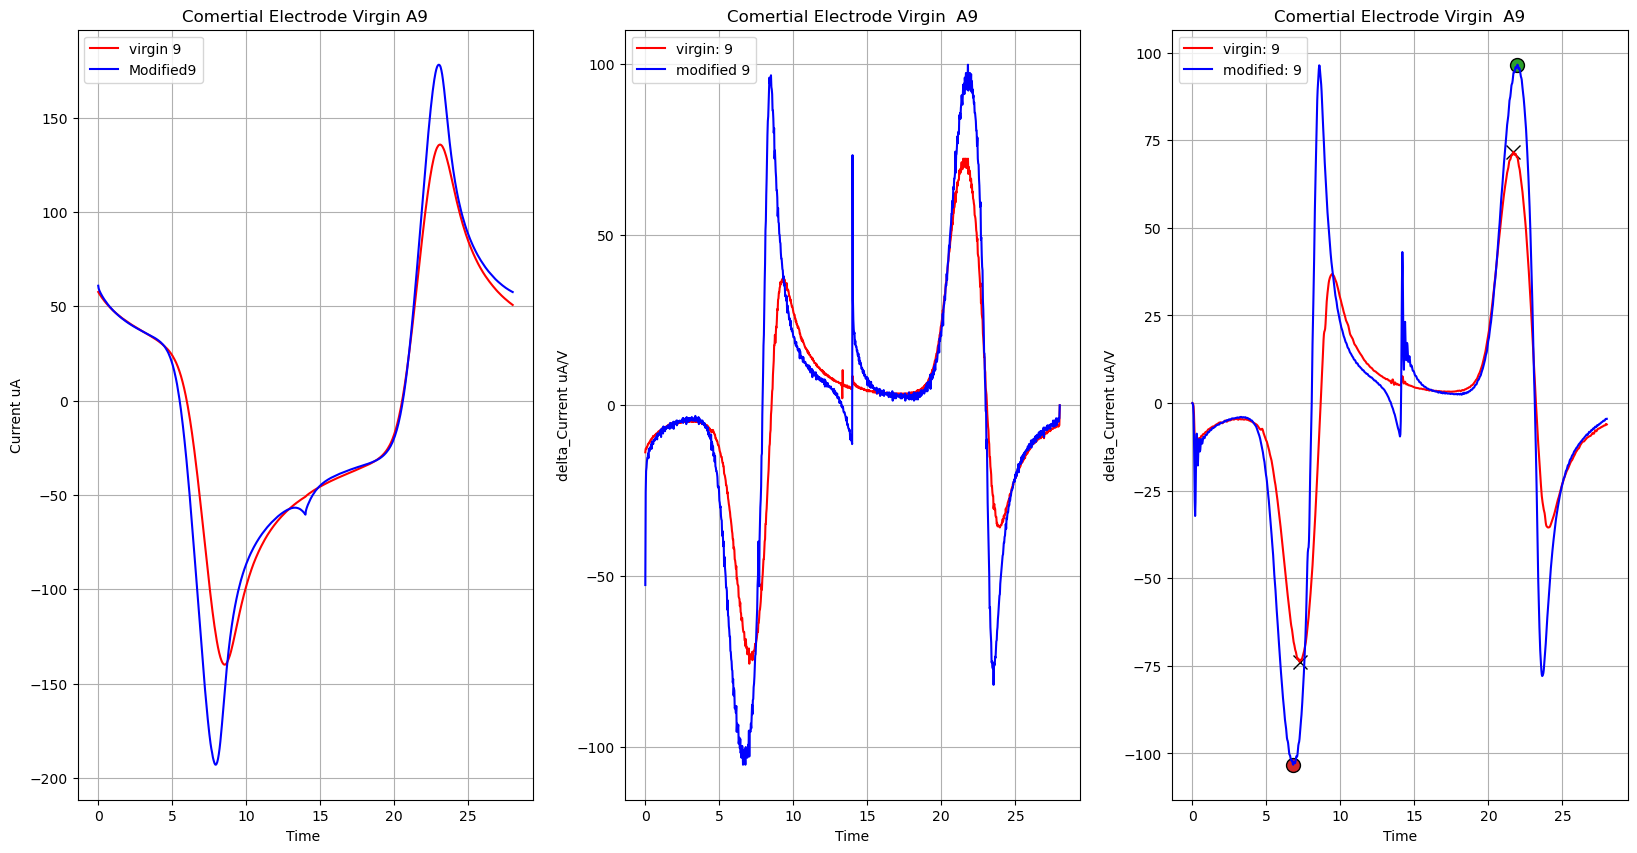

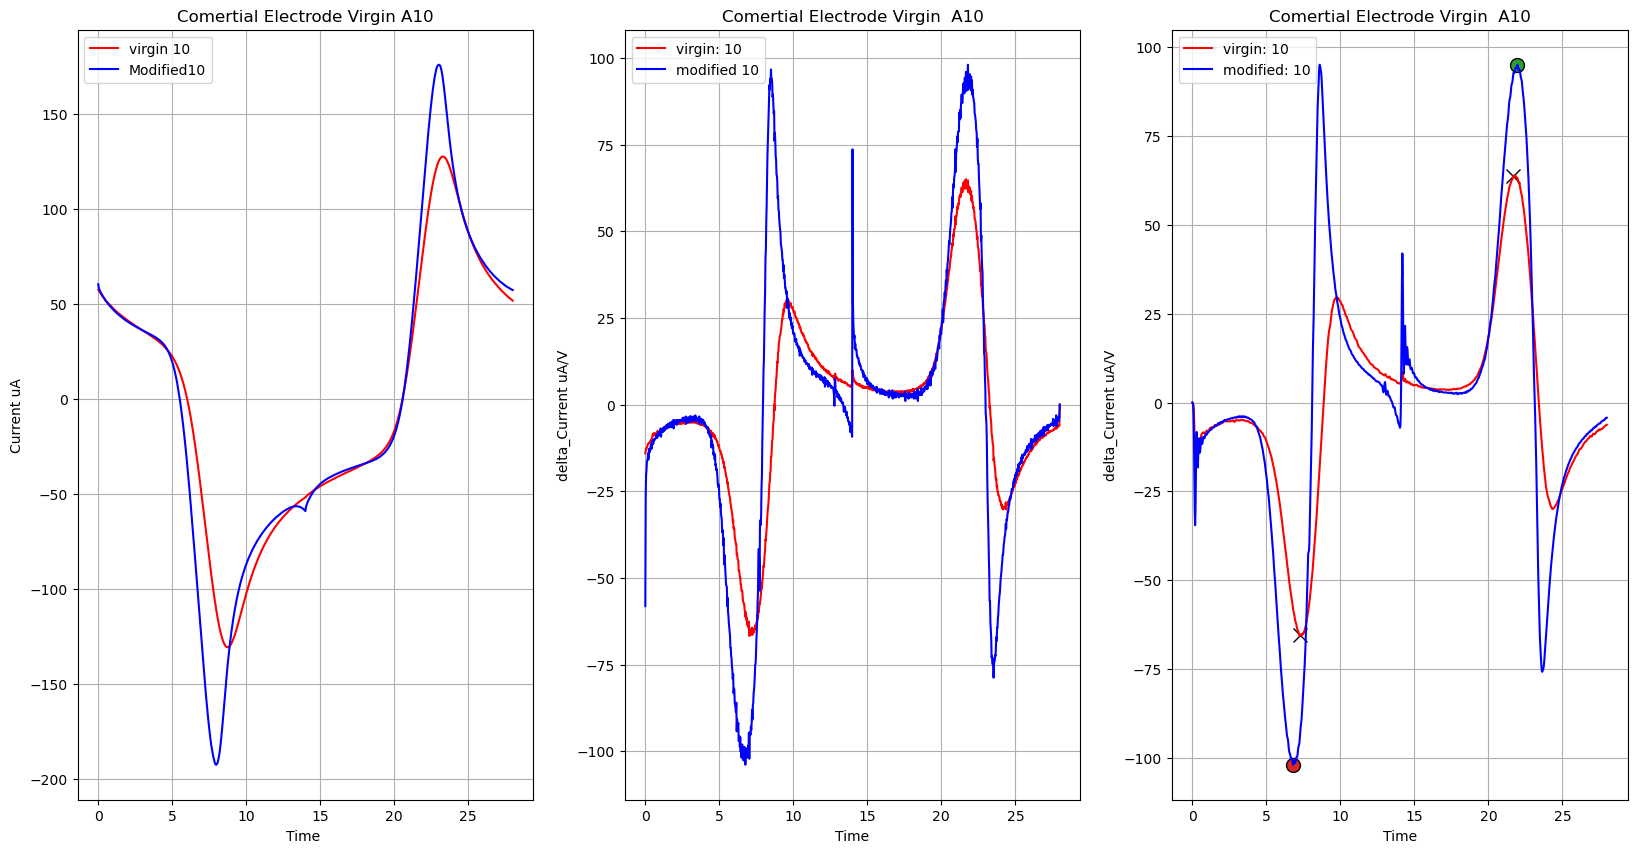

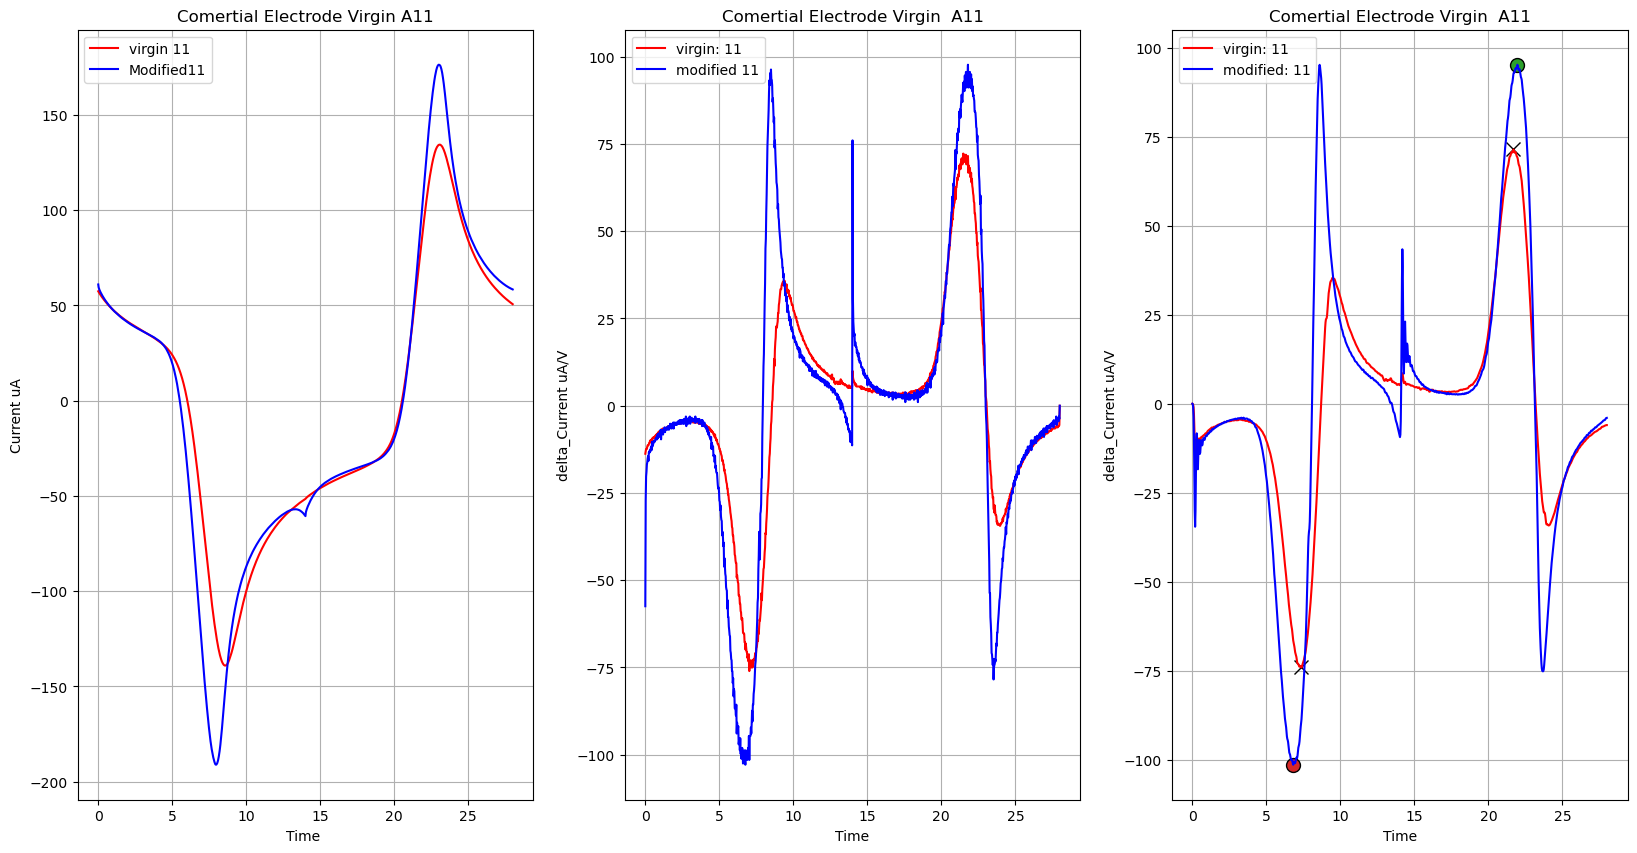

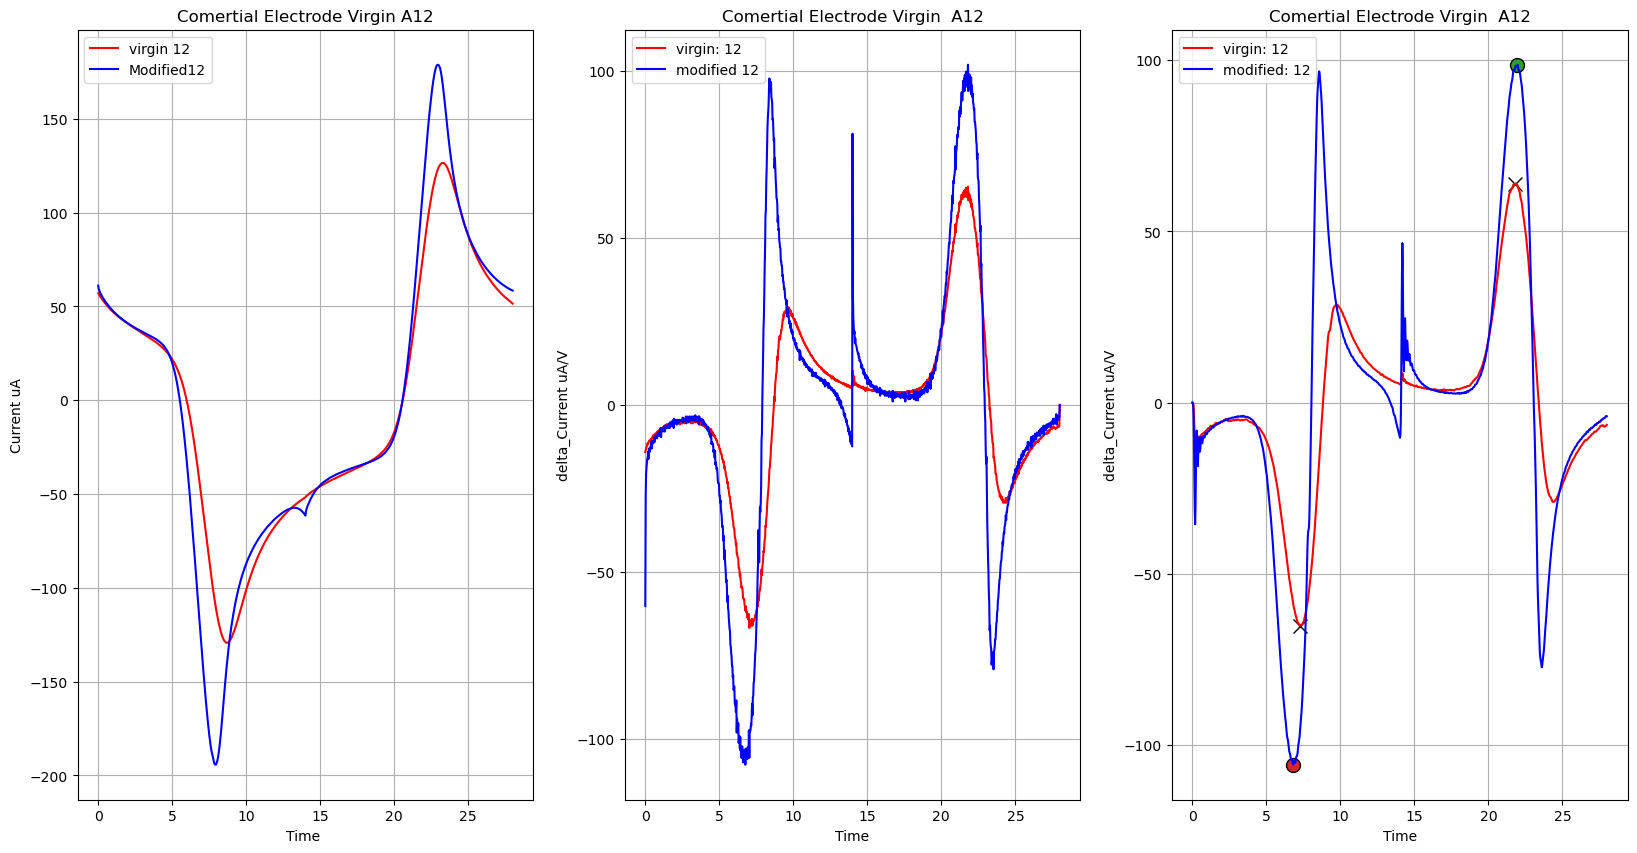

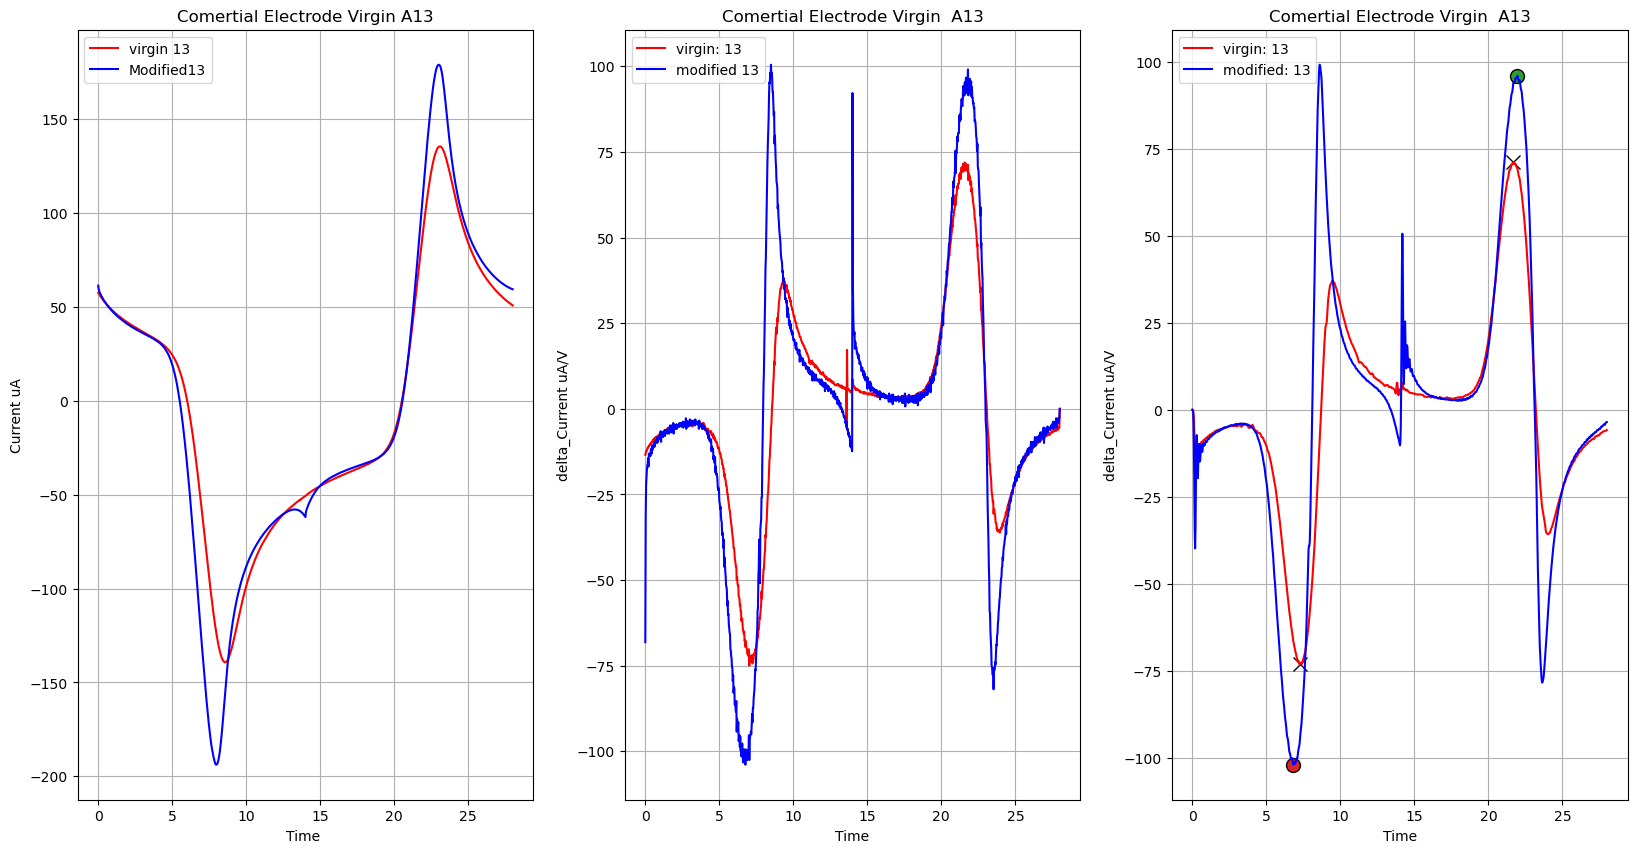

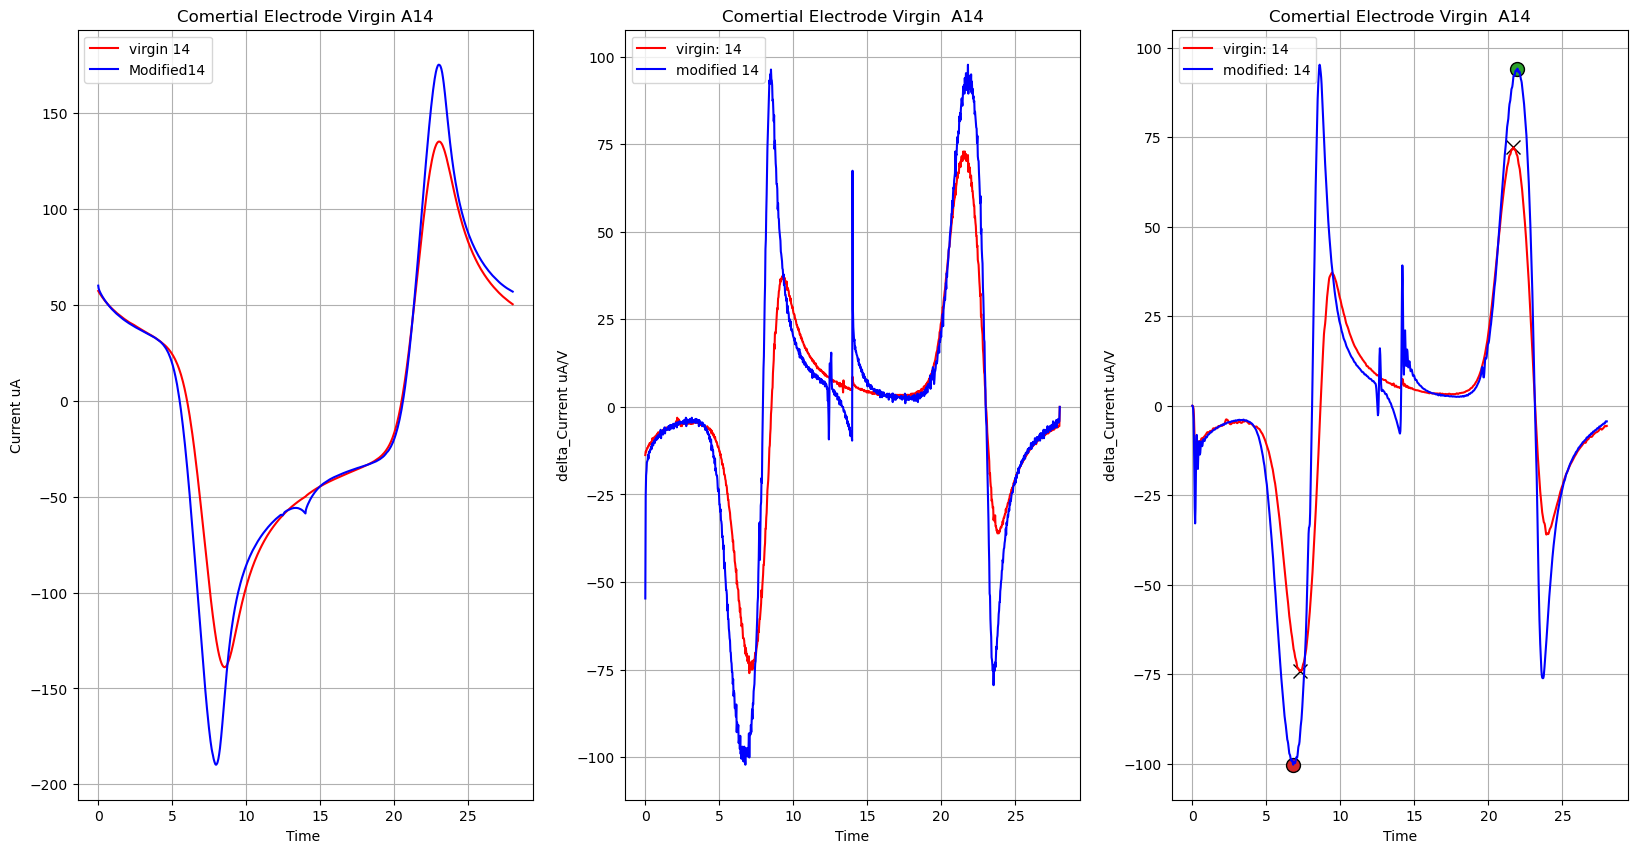

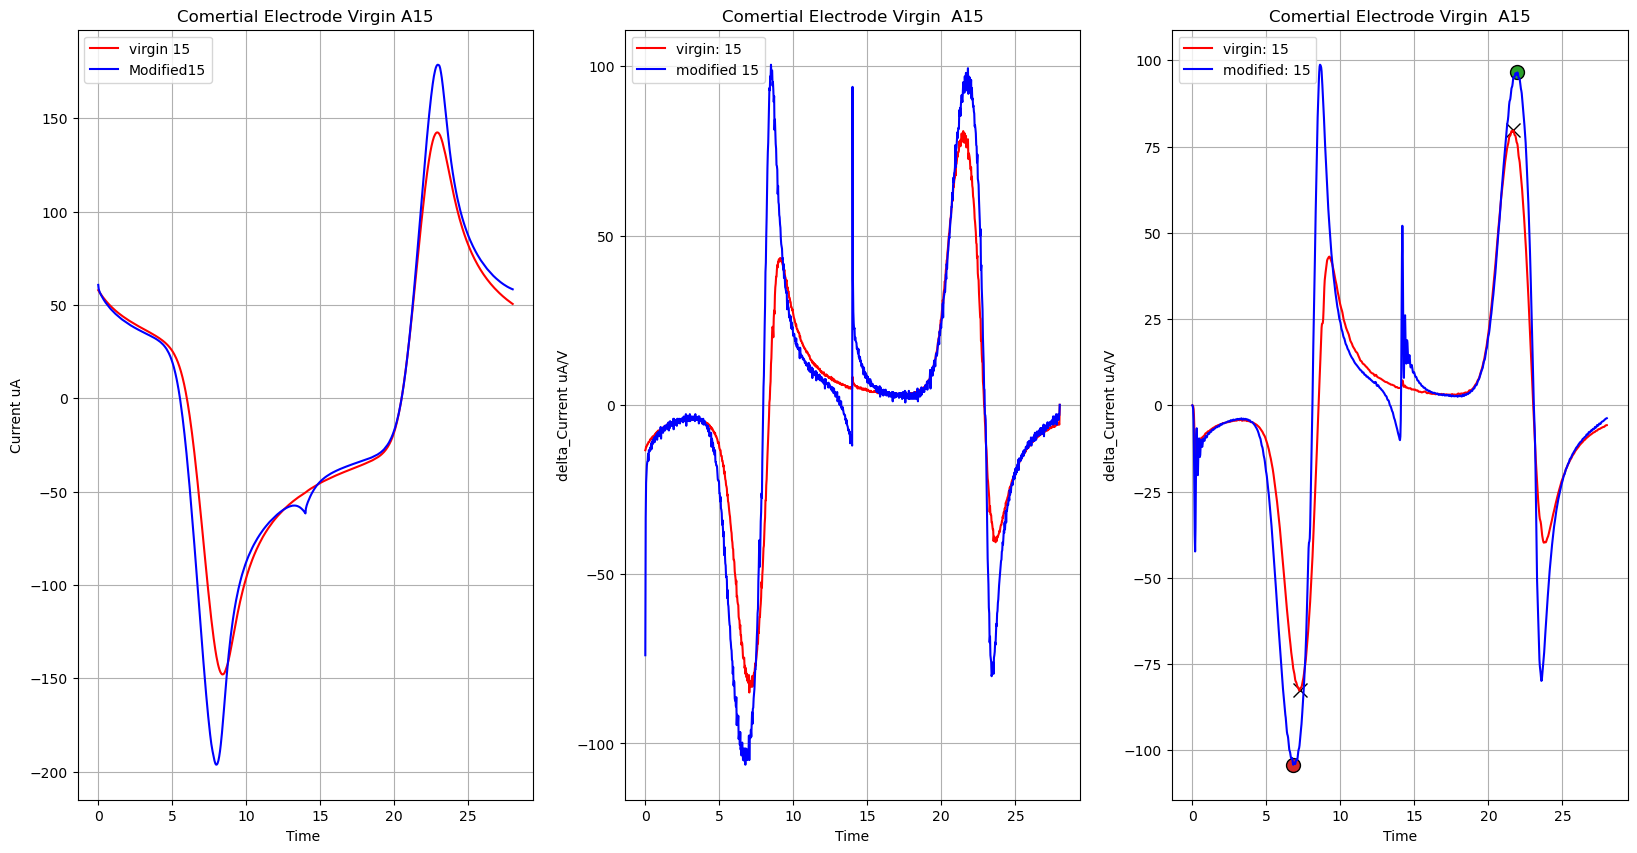

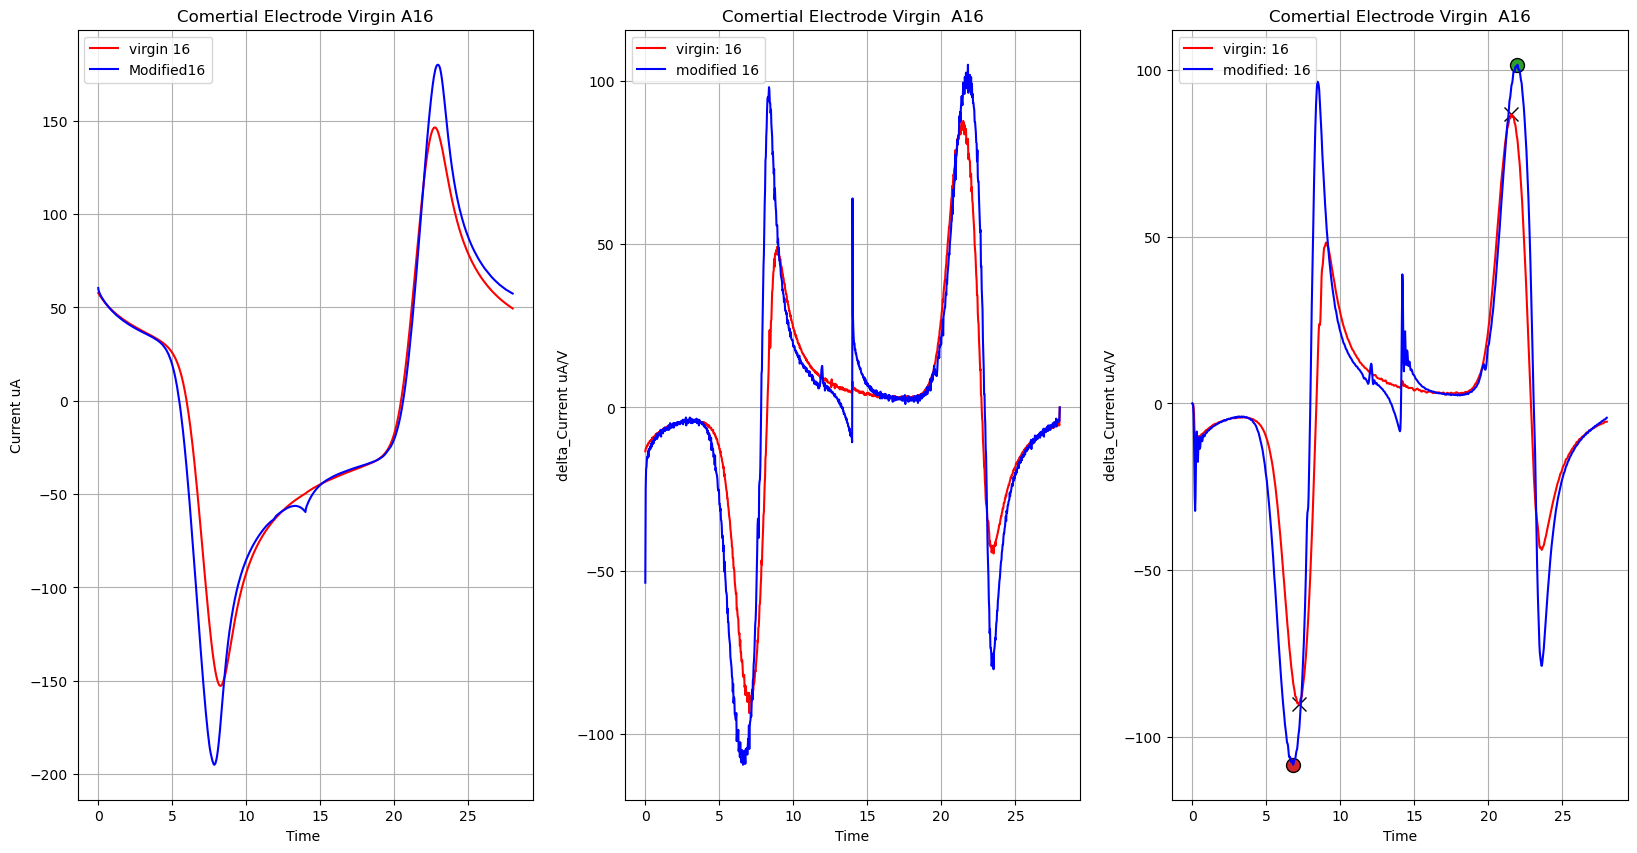

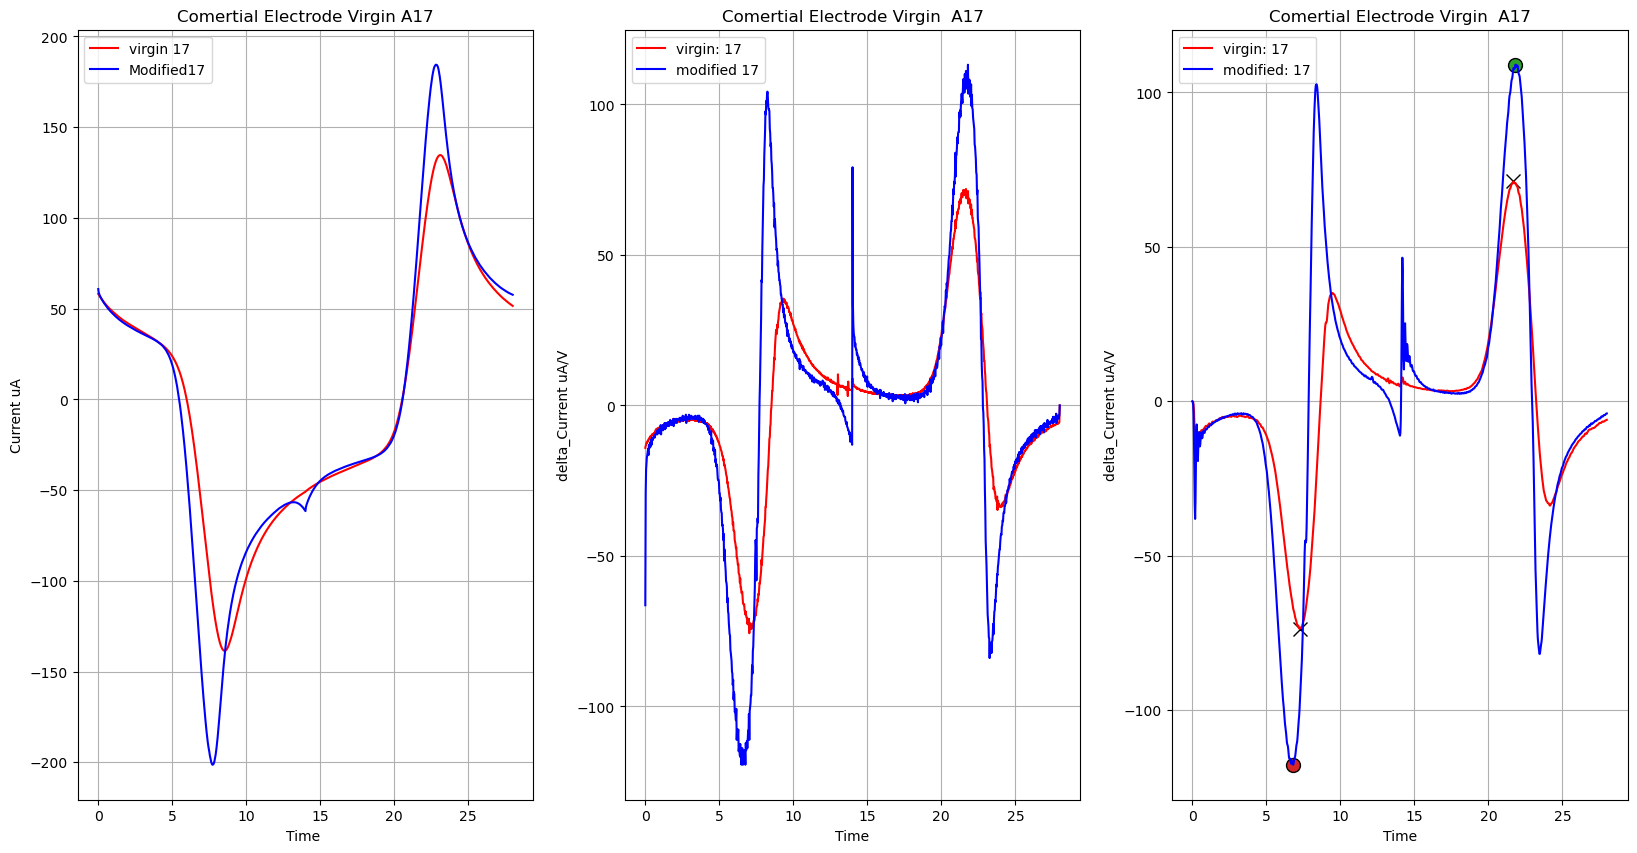

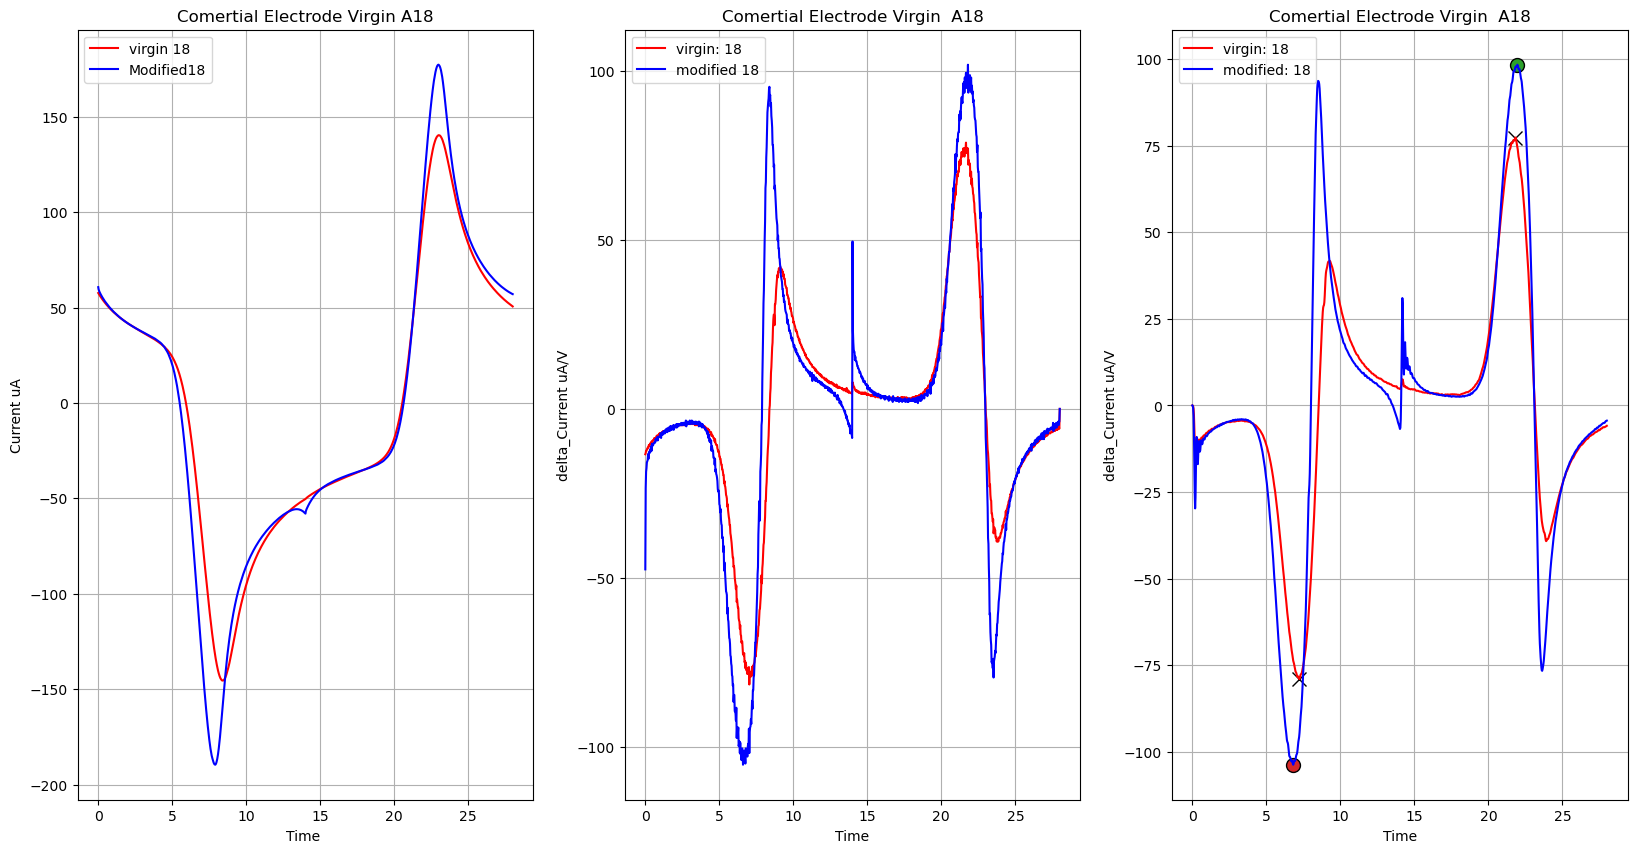

In [52]:
# Dados de eletrodos comerciais sem rodamina
charge_commertial = []
charge_commertial_rod = []
derivate_comertial_anodic_peak = []
derivate_comertial_cat_peak = []
derivate_comertial_anodic_rod_peak = []
derivate_comertial_cat_rod_peak = []

time = getTime(0.075, potential_comertial_elec)

plot_peak_rod = False
plot_peak = False

for i in range (1, comertial_electrode.shape[1]):
    
    current = comertial_electrode.iloc[:, i].values
    current_rod = comertial_rodamine.iloc[:, i].values

    current_derivate, derived_current_filtered = derivate(time, current)
    current_derivate_rod, derived_current_filtered_rod = derivate(time, current_rod)

    charge_commertial.append(getTotalCharge(current, time))
    charge_commertial_rod.append(getTotalCharge(current_rod, time))

    (anodic, cathodic) = getAnodicAndCathodicArguments(derived_current_filtered, fp, ox_inf = 800, ox_sup = 900, red_inf = 200, red_sup = 400)
    (anodic_rod, cathodic_rod) = getAnodicAndCathodicArguments(derived_current_filtered_rod, fp, ox_inf = 780, ox_sup = 900, red_inf = 200, red_sup = 350)

    if (anodic_rod != -1 and cathodic_rod != -1):
        derivate_comertial_anodic_rod_peak.append(derived_current_filtered_rod[anodic_rod])
        derivate_comertial_cat_rod_peak.append(derived_current_filtered_rod[cathodic_rod])
        plot_peak_rod = True
        
    elif (anodic_rod == -1):
         derivate_comertial_anodic_rod_peak.append(np.nan)
         derivate_comertial_cat_rod_peak.append(derived_current_filtered_rod[cathodic_rod])
         
    elif (cathodic_rod == -1):
        derivate_comertial_anodic_rod_peak.append(derived_current_filtered_rod[anodic_rod])
        derivate_comertial_cat_rod_peak.append(np.nan)
    
    
    if (anodic != -1 and cathodic != -1):
        derivate_comertial_anodic_peak.append(derived_current_filtered[anodic])
        derivate_comertial_cat_peak.append(derived_current_filtered[cathodic])
        plot_peak = True
        
    elif (anodic == -1):
         derivate_comertial_anodic_peak.append(np.nan)
         derivate_comertial_cat_peak.append(derived_current_filtered[cathodic])
         
    elif (cathodic == -1):
        derivate_comertial_anodic_peak.append(derived_current_filtered[anodic])
        derivate_comertial_cat_peak.append(np.nan)

    fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3,figsize=(20,10))
    ax1.set_title("Comertial Electrode Virgin " + comertial_electrode.columns[i])
    ax1.set_ylabel("Current uA")
    ax1.set_xlabel("Time ")
    ax1.grid(True)
        
    ax2.set_title("Comertial Electrode Virgin  " + comertial_electrode.columns[i])
    ax2.set_ylabel("delta_Current uA/V")
    ax2.set_xlabel("Time")
        
    ax2.grid(True)
    
    ax3.set_title("Comertial Electrode Virgin  " + comertial_electrode.columns[i])
    ax3.set_ylabel("delta_Current uA/V")
    ax3.set_xlabel("Time")
        
    ax3.grid(True)
        
          
    ax1.plot(time, current, color='r', label="virgin " + str(i))
    ax1.plot(time, current_rod, color='b', label="Modified" + str(i))
        
    ax1.legend() 
    ax2.plot(time, current_derivate, color='r', label="virgin: " + str(i))
    ax2.plot(time, current_derivate_rod, color='b', label="modified " + str(i))
    ax2.legend()
    
    if (plot_peak):
        ax3.plot(time[anodic], derived_current_filtered[anodic], marker="x", markersize=10, markeredgecolor="black")
        ax3.plot(time[cathodic], derived_current_filtered[cathodic], marker="x", markersize=10, markeredgecolor="black")
    
    if (plot_peak_rod):
        ax3.plot(time[anodic_rod], derived_current_filtered_rod[anodic_rod], marker="o", markersize=10, markeredgecolor="black")
        ax3.plot(time[cathodic_rod], derived_current_filtered_rod[cathodic_rod], marker="o", markersize=10, markeredgecolor="black")

    ax3.plot(time, derived_current_filtered, color='r', label="virgin: " + str(i))
    ax3.plot(time, derived_current_filtered_rod, color='b', label="modified: " + str(i))
    ax3.legend()
    plot_peak_rod = False
    plot_peak = False
    
plt.show()

In [68]:
# Mostra estatísticas de um vetor de medidas
def showStatistics(array):
    print(f"Mean: {np.mean(array)}")
    print(f"Median: {np.median(array)}")
    print(f"Std: {np.std(array)}")
    print(f"Maximum: {np.max(array)}")
    print(f"Minumum: {np.min(array)}")
    print(f"Resultado Normalidade Shapiro-Wilk {stats.shapiro(array)}")
    print("\n\n")
    sm.qqplot(np.array(array))

# Plota as classes de features em azul = positivo e vermelho = negativo
def plot_classes(positive, negative):
    fig, ax = plt.subplots(figsize=(7,5))
    ax.scatter(np.ones(shape=(len(positive))), positive, color='b', label='Rodamine')
    ax.scatter(np.zeros(shape=(len(negative))), negative, color='r', label='Virgin')
    plt.legend()
    plt.show()

# Plota os histogramas entre as classes e mostra o valor do teste de Mann-Whitney
def show_hist(positive, negative):
    myPositiveCharges = pd.DataFrame(positive)
    #myPositiveCharges.hist()
    myPositiveCharges.boxplot()
    # Observando se a distribuição dos dados é normal - Dados Negativos
    myNegativeCharges = pd.DataFrame(negative)
    #myNegativeCharges.hist()
    myNegativeCharges.boxplot()

    print(f"Resultado do teste de Mann-Whitney {stats.mannwhitneyu(negative, positive, alternative='two-sided')}")

## Estatísticas relacionadas a Carga - Eletrodo comercial

Virgem
Mean: -57.60771477151613
Median: -59.543570054843116
Std: 9.312459958418652
Maximum: -39.32551450303737
Minumum: -71.1564645967718
Resultado Normalidade Shapiro-Wilk ShapiroResult(statistic=0.9274341464042664, pvalue=0.17499276995658875)



Modificado
Mean: -117.7795673007117
Median: -120.19755624082936
Std: 6.034217871358664
Maximum: -99.39953387066987
Minumum: -125.05427989034433
Resultado Normalidade Shapiro-Wilk ShapiroResult(statistic=0.7798124551773071, pvalue=0.0007987332064658403)





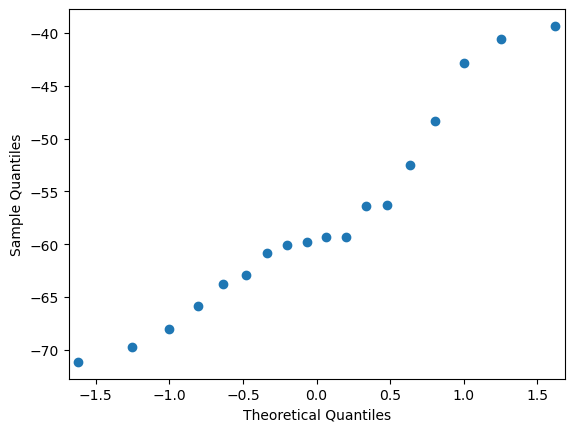

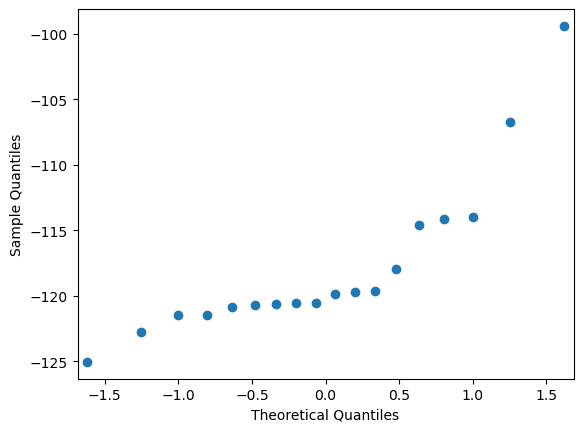

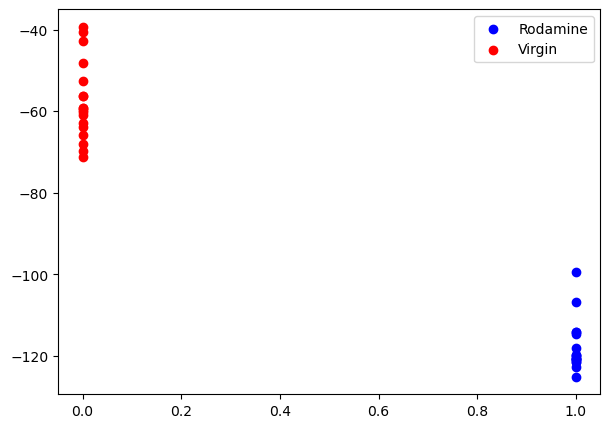

Resultado do teste de Mann-Whitney MannwhitneyuResult(statistic=324.0, pvalue=3.2278370106587223e-07)


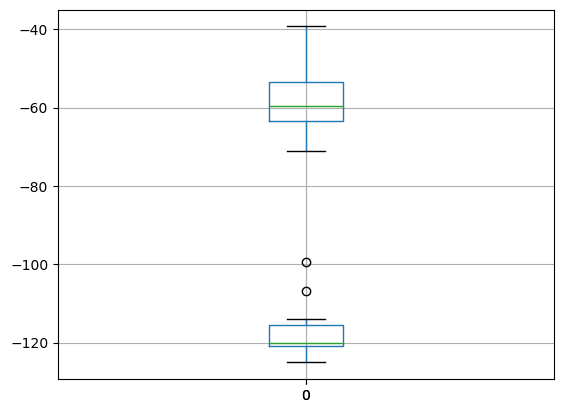

In [69]:
print("Virgem")
showStatistics(charge_commertial)
print("Modificado")
showStatistics(charge_commertial_rod)
plot_classes(charge_commertial_rod, charge_commertial)
show_hist(charge_commertial_rod, charge_commertial)

## Estatísticas relacionadas a corrente de pico anódica  

Virgem
Mean: 139.22435080555556
Median: 141.14441875
Std: 6.713924627258336
Maximum: 151.316
Minumum: 126.5232086
Resultado Normalidade Shapiro-Wilk ShapiroResult(statistic=0.9534711837768555, pvalue=0.48203086853027344)



Modificado
Mean: 178.29403361666667
Median: 177.84383725
Std: 2.8159063222263123
Maximum: 184.4403744
Minumum: 174.269
Resultado Normalidade Shapiro-Wilk ShapiroResult(statistic=0.9105069041252136, pvalue=0.08782228082418442)





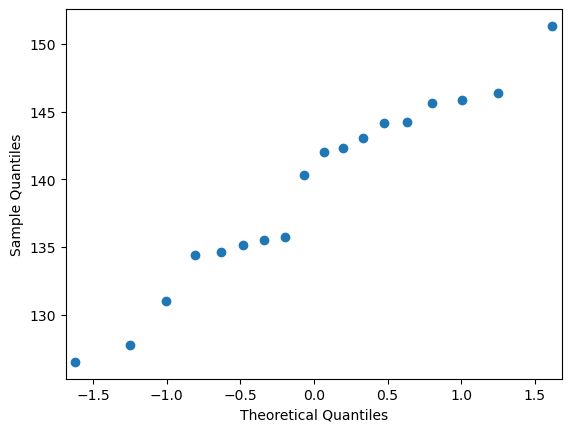

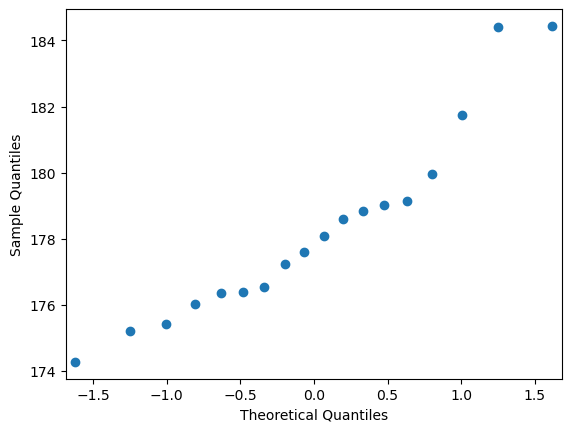

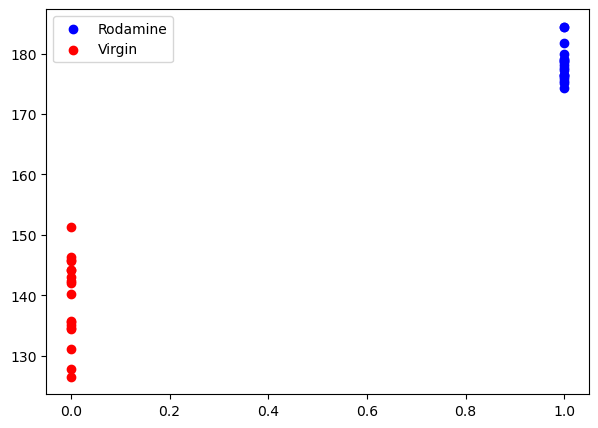

Resultado do teste de Mann-Whitney MannwhitneyuResult(statistic=0.0, pvalue=3.2278370106587223e-07)


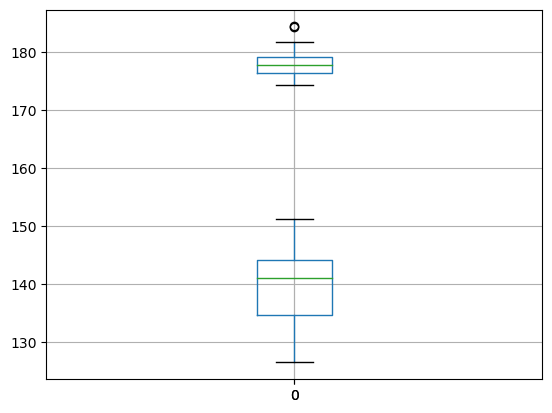

In [70]:
print("Virgem")
showStatistics(comertial_elec_anodic_current)
print("Modificado")
showStatistics(comertial_elec_anodic_current_rod)
plot_classes(comertial_elec_anodic_current_rod, comertial_elec_anodic_current)
show_hist(comertial_elec_anodic_current_rod, comertial_elec_anodic_current)


## Corrente catódica

Virgem
Mean: -143.31889867222222
Median: -145.79562255000002
Std: 7.145043630316953
Maximum: -129.3247938
Minumum: -153.285
Resultado Normalidade Shapiro-Wilk ShapiroResult(statistic=0.9255169034004211, pvalue=0.16186708211898804)



Modificado
Mean: -192.83642121666665
Median: -192.66651274999998
Std: 4.313097565627595
Maximum: -184.807
Minumum: -201.3046503
Resultado Normalidade Shapiro-Wilk ShapiroResult(statistic=0.9712755680084229, pvalue=0.8213085532188416)





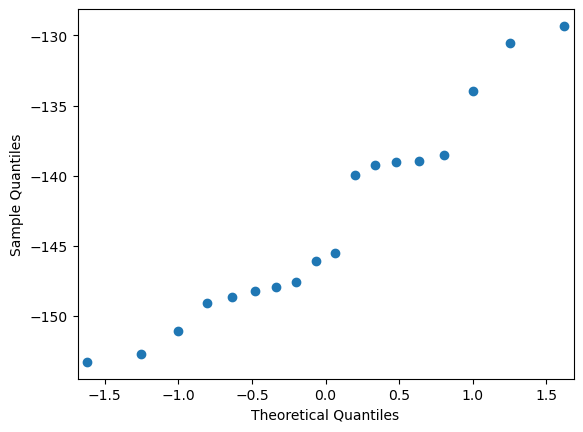

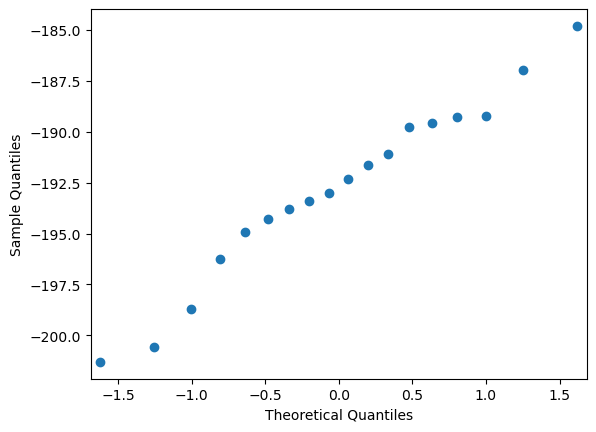

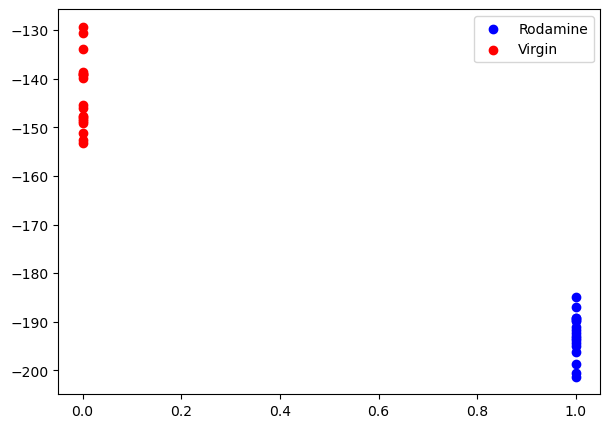

Resultado do teste de Mann-Whitney MannwhitneyuResult(statistic=324.0, pvalue=3.2278370106587223e-07)


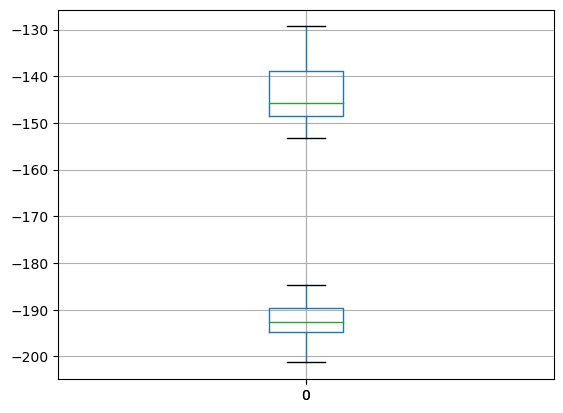

In [71]:
print("Virgem")
showStatistics(comertial_elec_cathodic_current)
print("Modificado")
showStatistics(comertial_elec_cathodic_current_rod)
plot_classes(comertial_elec_cathodic_current_rod, comertial_elec_cathodic_current)
show_hist(comertial_elec_cathodic_current_rod, comertial_elec_cathodic_current)

## Diferença entre corrente anódica e catódica

Virgem
Mean: 282.54324947777775
Median: 287.68596055
Std: 13.800479205442748
Maximum: 304.601
Minumum: 255.8480024
Resultado Normalidade Shapiro-Wilk ShapiroResult(statistic=0.9394152760505676, pvalue=0.28317898511886597)



Modificado
Mean: 371.1304548333333
Median: 369.73219515
Std: 7.015559879282246
Maximum: 385.7175589
Minumum: 359.076
Resultado Normalidade Shapiro-Wilk ShapiroResult(statistic=0.945436418056488, pvalue=0.3579653799533844)





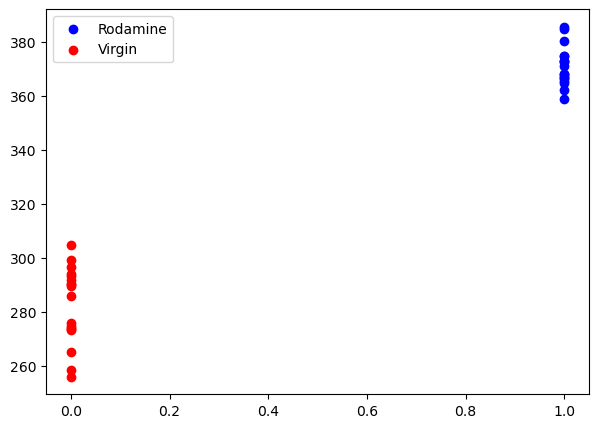

Resultado do teste de Mann-Whitney MannwhitneyuResult(statistic=0.0, pvalue=3.2278370106587223e-07)


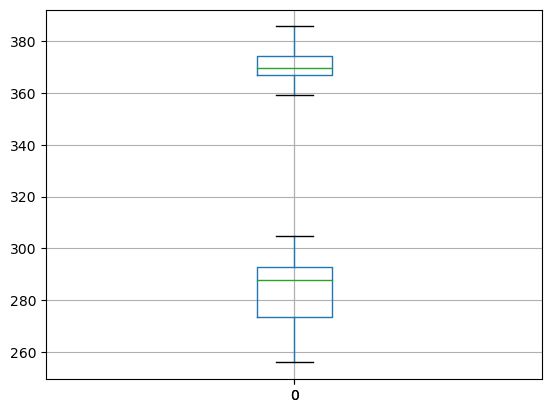

In [57]:
print("Virgem")
showStatistics(comertial_elec_diff_ano_cat_current)
print("Modificado")
showStatistics(comertial_elec_diff_ano_cat_current_rod)
plot_classes(comertial_elec_diff_ano_cat_current_rod, comertial_elec_diff_ano_cat_current)
show_hist(comertial_elec_diff_ano_cat_current_rod, comertial_elec_diff_ano_cat_current)

## Diferença entre os potenciais anódico e catódico

Virgem
Mean: 0.2577638972222222
Median: 0.25354915
Std: 0.02371485690158452
Maximum: 0.301464
Minumum: 0.2236025
Resultado Normalidade Shapiro-Wilk ShapiroResult(statistic=0.9412384629249573, pvalue=0.30423298478126526)



Modificado
Mean: 0.2136200611111111
Median: 0.2176126
Std: 0.010500985111308944
Maximum: 0.22360239999999998
Minumum: 0.18966239999999998
Resultado Normalidade Shapiro-Wilk ShapiroResult(statistic=0.828886091709137, pvalue=0.0040048155933618546)





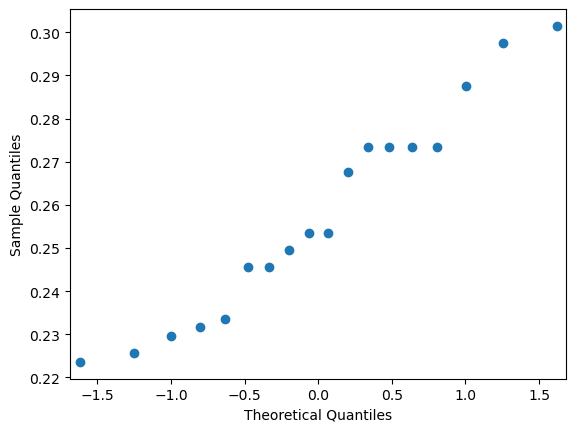

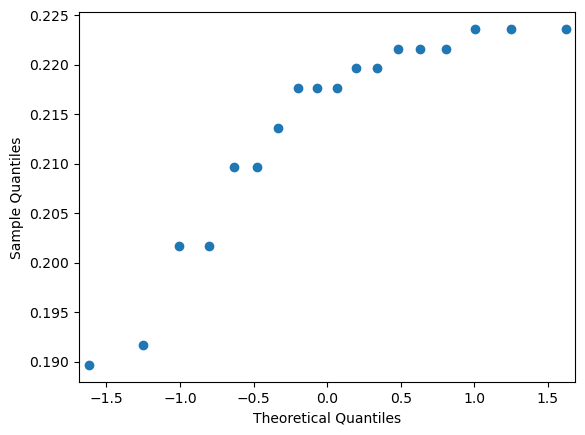

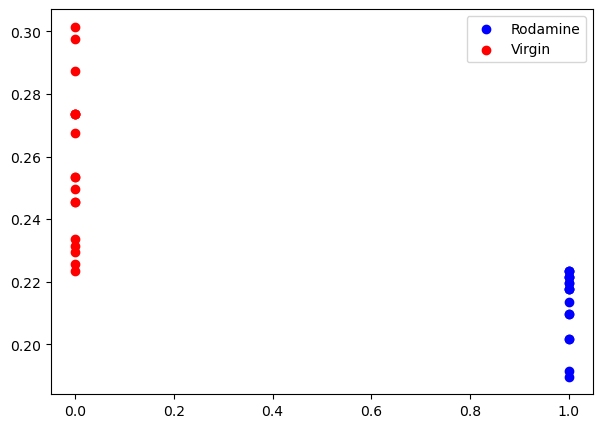

Resultado do teste de Mann-Whitney MannwhitneyuResult(statistic=324.0, pvalue=3.1555153732145685e-07)


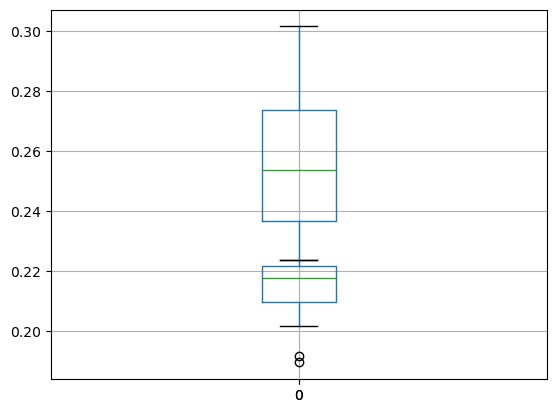

In [72]:
print("Virgem")
showStatistics(comertial_elec_diff_ano_cat_potential)
print("Modificado")
showStatistics(comertial_elec_diff_ano_cat_potential_rod)
plot_classes(comertial_elec_diff_ano_cat_potential_rod, comertial_elec_diff_ano_cat_potential)
show_hist(comertial_elec_diff_ano_cat_potential_rod, comertial_elec_diff_ano_cat_potential)

## Pico da derivada anódica

Virgem
Mean: 76.22063520595385
Median: 77.54169295622769
Std: 7.231036409671507
Maximum: 86.68641042665283
Minumum: 63.908561812394346
Resultado Normalidade Shapiro-Wilk ShapiroResult(statistic=0.9346115589141846, pvalue=0.23387323319911957)



Modificado
Mean: 98.75826574481816
Median: 97.23905682254107
Std: 4.495546902402302
Maximum: 109.7420922152621
Minumum: 94.14952349858618
Resultado Normalidade Shapiro-Wilk ShapiroResult(statistic=0.8385821580886841, pvalue=0.005623907316476107)





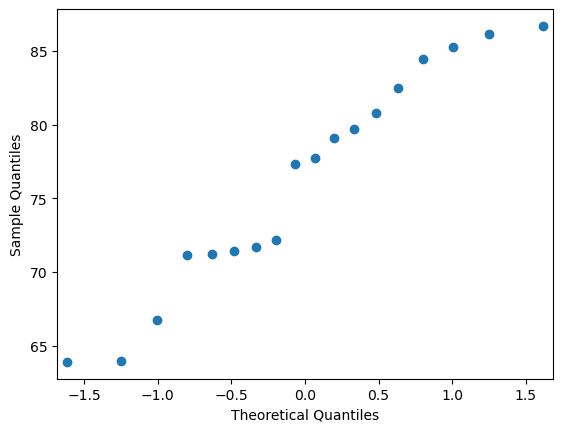

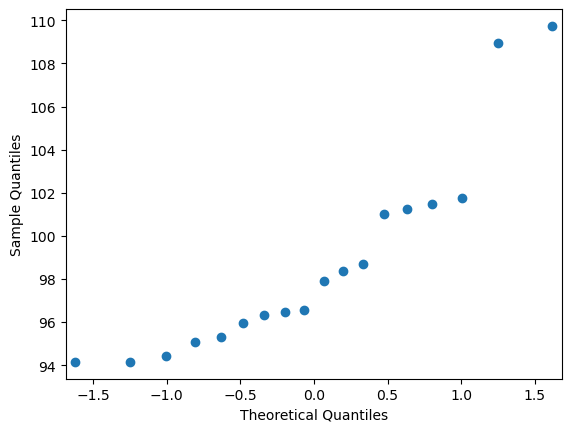

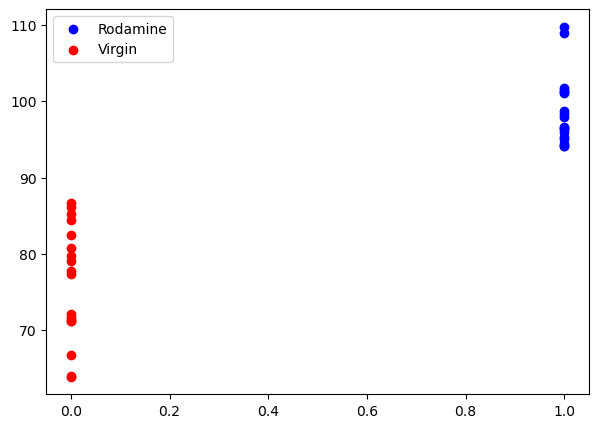

Resultado do teste de Mann-Whitney MannwhitneyuResult(statistic=0.0, pvalue=3.2278370106587223e-07)


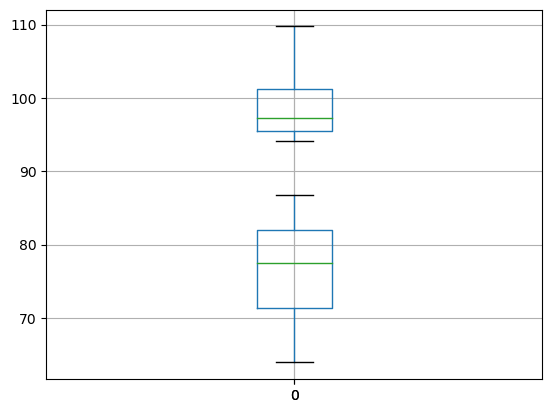

In [73]:
print("Virgem")
showStatistics(derivate_comertial_anodic_peak)
print("Modificado")
showStatistics(derivate_comertial_anodic_rod_peak)
plot_classes(derivate_comertial_anodic_rod_peak, derivate_comertial_anodic_peak)
show_hist(derivate_comertial_anodic_rod_peak, derivate_comertial_anodic_peak)

## Pico da Derivada da corrente catódica

Virgem
Mean: -78.40354688076513
Median: -79.68650642320151
Std: 7.565398254522831
Maximum: -65.23233258698217
Minumum: -90.11584765549118
Resultado Normalidade Shapiro-Wilk ShapiroResult(statistic=0.944564163684845, pvalue=0.3461821377277374)



Modificado
Mean: -105.38167411716665
Median: -103.95792369049276
Std: 5.267310083274611
Maximum: -99.02702443575059
Minumum: -118.15197188764722
Resultado Normalidade Shapiro-Wilk ShapiroResult(statistic=0.8500469923019409, pvalue=0.008483152836561203)





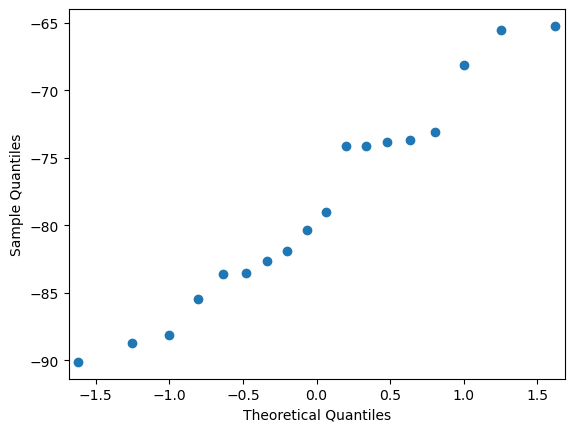

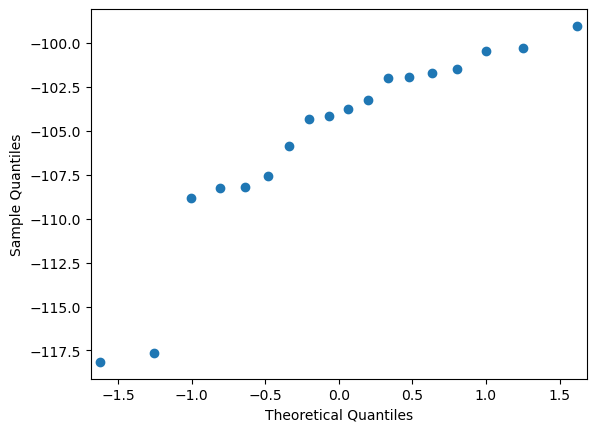

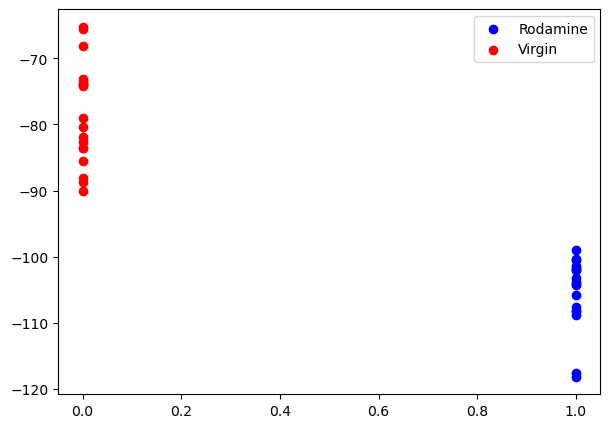

Resultado do teste de Mann-Whitney MannwhitneyuResult(statistic=324.0, pvalue=3.2278370106587223e-07)


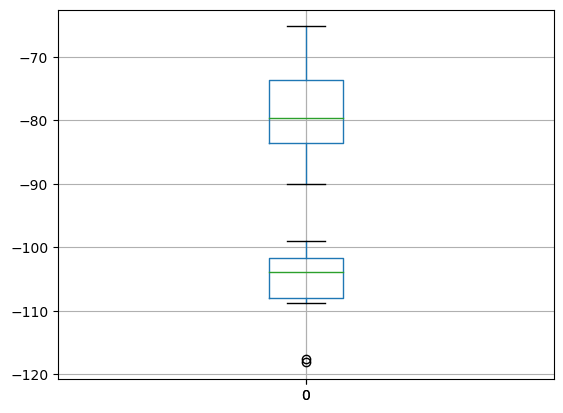

In [74]:
print("Virgem")
showStatistics(derivate_comertial_cat_peak)
print("Modificado")
showStatistics(derivate_comertial_cat_rod_peak)
plot_classes(derivate_comertial_cat_rod_peak, derivate_comertial_cat_peak)
show_hist(derivate_comertial_cat_rod_peak, derivate_comertial_cat_peak)

# Dataset comercial

In [80]:
columns = ['corrente_anodica','corrente_catodica','carga','diff_corrente_anodica_catodica','diff_pot_anodico_catodico','pico_derivada_anodica','pico_derivada_catodica','target']
comertial_virgin = pd.DataFrame(columns=columns)
comertial_virgin['corrente_anodica'] = np.array(comertial_elec_anodic_current).T
comertial_virgin['corrente_catodica'] = np.array(comertial_elec_cathodic_current).T
comertial_virgin['carga'] = np.array(charge_commertial).T
comertial_virgin['diff_corrente_anodica_catodica'] = np.array(comertial_elec_diff_ano_cat_current).T
comertial_virgin['diff_pot_anodico_catodico'] = np.array(comertial_elec_diff_ano_cat_potential).T
comertial_virgin['pico_derivada_anodica'] = np.array(derivate_comertial_anodic_peak).T
comertial_virgin['pico_derivada_catodica'] = np.array(derivate_comertial_cat_peak).T
comertial_virgin['target'] = np.zeros(shape=(comertial_virgin['pico_derivada_catodica'].shape), dtype=int)


In [83]:

comertial_virgin.to_csv('comertial_virgin.csv')

In [84]:
columns = ['corrente_anodica','corrente_catodica','carga','diff_corrente_anodica_catodica','diff_pot_anodico_catodico','pico_derivada_anodica','pico_derivada_catodica','target']
comertial_virgin_rod = pd.DataFrame(columns=columns)
comertial_virgin_rod['corrente_anodica'] = np.array(comertial_elec_anodic_current_rod).T
comertial_virgin_rod['corrente_catodica'] = np.array(comertial_elec_cathodic_current_rod).T
comertial_virgin_rod['carga'] = np.array(charge_commertial_rod).T
comertial_virgin_rod['diff_corrente_anodica_catodica'] = np.array(comertial_elec_diff_ano_cat_current_rod).T
comertial_virgin_rod['diff_pot_anodico_catodico'] = np.array(comertial_elec_diff_ano_cat_potential_rod).T
comertial_virgin_rod['pico_derivada_anodica'] = np.array(derivate_comertial_anodic_rod_peak).T
comertial_virgin_rod['pico_derivada_catodica'] = np.array(derivate_comertial_cat_rod_peak).T
comertial_virgin_rod['target'] = np.zeros(shape=(comertial_virgin['pico_derivada_catodica'].shape), dtype=int)

In [85]:

comertial_virgin_rod.to_csv('comertial_rodamine.csv')

In [86]:
comertial_virgin_rod.describe()

corrente_anodica  corrente_catodica       carga  \
count         18.000000          18.000000   18.000000   
mean         178.294034        -192.836421 -117.779567   
std            2.897544           4.438141    6.209159   
min          174.269000        -201.304650 -125.054280   
25%          176.372210        -194.756234 -120.825813   
50%          177.843837        -192.666513 -120.197556   
75%          179.116488        -189.642942 -115.407970   
max          184.440374        -184.807000  -99.399534   

       diff_corrente_anodica_catodica  diff_pot_anodico_catodico  \
count                       18.000000                  18.000000   
mean                       371.130455                   0.213620   
std                          7.218952                   0.010805   
min                        359.076000                   0.189662   
25%                        366.839100                   0.209628   
50%                        369.732195                   0.217613   
75%                        374.431229                   0.221605   
max                        385.717559                   0.223602   

       pico_derivada_anodica  pico_derivada_catodica  target  
count              18.000000               18.000000    18.0  
mean               98.758266             -105.381674     0.0  
std                 4.625880                5.420017     0.0  
min                94.149523             -118.151972     0.0  
25%                95.451144             -108.058770     0.0  
50%                97.239057             -103.957924     0.0  
75%               101.185178             -101.774336     0.0  
max               109.742092              -99.027024     0.0

In [87]:
comertial_virgin.describe()

corrente_anodica  corrente_catodica      carga  \
count         18.000000          18.000000  18.000000   
mean         139.224351        -143.318899 -57.607715   
std            6.908571           7.352189   9.582442   
min          126.523209        -153.285000 -71.156465   
25%          134.763098        -148.535164 -63.544505   
50%          141.144419        -145.795623 -59.543570   
75%          144.232195        -138.965440 -53.443582   
max          151.316000        -129.324794 -39.325515   

       diff_corrente_anodica_catodica  diff_pot_anodico_catodico  \
count                       18.000000                  18.000000   
mean                       282.543249                   0.257764   
std                         14.200576                   0.024402   
min                        255.848002                   0.223603   
25%                        273.604941                   0.236579   
50%                        287.685961                   0.253549   
75%                        292.906842                   0.273514   
max                        304.601000                   0.301464   

       pico_derivada_anodica  pico_derivada_catodica  target  
count              18.000000               18.000000    18.0  
mean               76.220635              -78.403547     0.0  
std                 7.440675                7.784731     0.0  
min                63.908562              -90.115848     0.0  
25%                71.275496              -83.591237     0.0  
50%                77.541693              -79.686506     0.0  
75%                82.045300              -73.693460     0.0  
max                86.686410              -65.232333     0.0